# <font color=blue>COS60008 - INTRODUCTION TO DATA SCIENCE - TEAM PROJECT</font>


## Group 4

#### 100660983 - Emmanuel Lygris (1.00)
#### 103141588 - Prim Hansakul (1.00)
#### 103490976 - Gurarshdeep Kaur (1.00)
#### 102451655 - Simran Kaur (0.50)


In [1]:
#Note from Emmanuel Lygris: This took about 1 minute 30 seconds to run on my laptop until the map generated

In [2]:
################################################
####IMPORT MAIN LIBRARIES USED FOR ANALYSIS#####
################################################
#import main libraries used for analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

%matplotlib inline

from scipy import stats
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation
from sklearn.model_selection import cross_val_score 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import precision_score,recall_score, precision_recall_fscore_support
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.width', None) 
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')


## <font color=blue>Task 1 - Perform data pre-processing</font>

### Data Pre-processing Activities
* Loading Data
* Checking for typos
* Dealing with missing values 
* Creating dummy variables.

#### 1.1)  Load Data from CSV and Check/Validate Data

In [3]:
#*****************************************************************************************
#*******************1.1 lOAD DATA FROM CSV AND CHECK/VALIDATE DATA**************************
#*****************************************************************************************

#csv files have new line characters, hyphens, non-breaking spaces and other characters in their name
#could replace them with something like: #dataset.columns = df.columns.astype(str).str.replace("[-()\n\s+]", "_").str.replace("(_)+", "_") 
#but easier just to hard code the names we want to use
columnNames = ['Company_Maker','Specific_Bean_Origin_or_Bar_Name','REF','Review_Year', 'Cocoa_Percentage','Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']

#It was noted that some columns appeared blank but were not NaN. After looping through some rows it was discovered that the
#values in these fields were a non-breaking space.  Hence we add chr(160) to the na_values to bring these in as NaN.  Could
#also convert after loading the CSV
dataset = pd.read_csv('chocolate.csv', header = 0,  sep = ",",na_values =  [""," ","?", chr(160)],names=columnNames) 

#REFERENCE https://towardsdatascience.com/dealing-with-extra-white-spaces-while-reading-csv-in-pandas-67b0c2b71e6a
# convert non-breaking space to space character and then remove any leading or trailing spaces from all cells in dataframe
dataset = dataset.replace(chr(160)," ").replace({"^\s*|\s*$":""}, regex=True).replace({"":np.nan})  

#########################################################################################################################
#Check the shape of the dataset
print('The shape of the dataset is ' + str(dataset.shape))
print("#"*100)  #prints 100 hash symbols just to separate out the output
#########################################################################################################################
#Get information about the columns and their data types
print("***INFORMATION ABOUT DATASET***")
dataset.info()
print("*"*50)  
#########################################################################################################################
#Check the first 3 rows of each dataset
print("***HEADER DATA - FIRST 3 ROWS***")
print(dataset.head(3))
print("*"*100)
#########################################################################################################################
#Check last 3 rows of each dataset
print("***TAIL DATA - LAST 3 ROWS***")
print(dataset.tail(3))
print("*"*100)
#########################################################################################################################
#Describe each dataset's numeric columns
print("***SUMMARY STATISTICS - NUMERIC COLUMNS***")
print(dataset.describe(include = [np.number]))
print("*"*100)
#########################################################################################################################
#Describe each dataset's non-numeric columns
print("***SUMMARY STATISTICS - NON-NUMERIC COLUMNS***")
print(dataset.describe(exclude = [np.number]))
print("*"*100)
#########################################################################################################################
#Check the counts of each column - this will give a sense of which columns have NaN
print("***CHECK COLUMN COUNTS***")
print(dataset.count())
print("*"*100)
#########################################################################################################################
#Check the uniqueness of each column - this will give a sense of the dimensionality of each column
print("***CHECK COLUMN UNIQUENESS COUNTS***")
print(dataset.nunique())
print("*"*100)
#########################################################################################################################
# Explore categorical variables by frequencies of the unique values (percentage) and display the top 10 for each column
# Check top 10 values by frequency for each column and determine the percentage of data they represent
print("Percentage occurrence of the top 10 values per categorical column:")
print("*"*100)
column_cata = ['Company_Maker','Specific_Bean_Origin_or_Bar_Name','Company_Location','Bean_Type','Broad_Bean_Origin']
for c in dataset[column_cata]:
    print(c)
    print("*"*50)
    print(dataset[c].value_counts(normalize=True).head(10))#get index value
    print("*"*100)
#########################################################################################################################
# Check for columns that appear to have multiple values stored in one cell, such as bean origin
# Not sure if we need to try and normalise data to 1st Normal Form

column_cata = ['Company_Maker','Specific_Bean_Origin_or_Bar_Name','Company_Location','Bean_Type','Broad_Bean_Origin']
for c in dataset[column_cata]:
    print('Number of rows in ', c , 'which contain multivalued cells is:')
    a = dataset[dataset[c].str.contains(',', na=False)].shape[0]
    print(dataset[dataset[c].str.contains(',', na=False)].shape[0])
    print(str(a/len(dataset)),'% of the dataset')
    print("*"*50)

The shape of the dataset is (1500, 9)
####################################################################################################
***INFORMATION ABOUT DATASET***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company_Maker                     1500 non-null   object 
 1   Specific_Bean_Origin_or_Bar_Name  1500 non-null   object 
 2   REF                               1500 non-null   int64  
 3   Review_Year                       1500 non-null   int64  
 4   Cocoa_Percentage                  1500 non-null   object 
 5   Company_Location                  1500 non-null   object 
 6   Rating                            1500 non-null   float64
 7   Bean_Type                         749 non-null    object 
 8   Broad_Bean_Origin                 1438 non-null   object 
dtypes: float64(1), int64(2), 

#### 1.2)  Check Data for Missing Values

In [4]:
##The above data shows some columns do not have a 1500 row count meaning we expect missing values in Bean_Type and Broad_Bean_Origin
#The below will detail some of these findings
print("***CHECK IF ANY COLUMNS HAVE NULL/MISSING VALUES and how many rows/columns are impacted***")
print("Check which columns have any null values and print the percentage missing")
print(dataset.isnull().any())  #this just says if the column has any missing values
print("*"*100)
#########################################################################################################################
print("Ths number of missing values per column is:")
print(dataset.isna().sum())
print("*"*100)
#########################################################################################################################
print("The percentage missing per column is :")
percent_missing = (dataset.isnull().sum() / len(dataset)) * 100 #no missing values per column / total number of rows * 100
#percent_missing = dataset.isna().mean().round(4) * 100  #alternative method for calculating percentage missing
print(percent_missing)
print("*"*100)
#########################################################################################################################
#.isnull().any().sum())) #determine how many columns have nulls, axis=1 means to check rows
print("The number of columns with missing values is " + str(dataset.isnull().any().sum())) #determine how many columns have 
print("The number of rows with missing values is " + str(dataset.isnull().any(axis = 1).sum())) #determine how many rows have missing values
print("The number of missing values is " + str(dataset.isnull().sum().sum())) # Total number of missing values 
print("*"*100)
#########################################################################################################################
#The below calculates the total columns with missing data and divides by the total number of columns 27 (although technically the id should probably not be counted)
#As only 2 columns are missing data and there are 27 columns in total, then the most that could be missing in a row is 2/27 which is less than 50%
maxRowPctMissing = (dataset.isnull().any().sum()/len(dataset.columns))*100
maxRowPctMissing = np.round(maxRowPctMissing,2)
print("The maximum possible amount of missing data per row is " + str(maxRowPctMissing) +'%')#/(len(dataset.columns))*100))
print("*"*100)
#########################################################################################################################
#Create a filter and display the rows of data which do not have a Broad_Bean_Original value to see if there are any obvious fixes 
BroadBeanOriginIsNullFilter = dataset.Broad_Bean_Origin.isna() == True
df1 = dataset[BroadBeanOriginIsNullFilter]
print("Shape of Broad_Bean_Origin Null values is " + str(df1.shape))
df1

***CHECK IF ANY COLUMNS HAVE NULL/MISSING VALUES and how many rows/columns are impacted***
Check which columns have any null values and print the percentage missing
Company_Maker                       False
Specific_Bean_Origin_or_Bar_Name    False
REF                                 False
Review_Year                         False
Cocoa_Percentage                    False
Company_Location                    False
Rating                              False
Bean_Type                            True
Broad_Bean_Origin                    True
dtype: bool
****************************************************************************************************
Ths number of missing values per column is:
Company_Maker                         0
Specific_Bean_Origin_or_Bar_Name      0
REF                                   0
Review_Year                           0
Cocoa_Percentage                      0
Company_Location                      0
Rating                                0
Bean_Type           

Company_Maker  \
1            Original Beans (Felchlin)   
7                        Kaoka (Cemoi)   
39                              Amedei   
40                      Chloe Chocolat   
42                              Domori   
131                             Amedei   
140                           S.A.I.D.   
183                           Guittard   
214                              Zak's   
276                           Valrhona   
287                             Amedei   
293                        Bahen & Co.   
298                           Guittard   
299                   Scharffen Berger   
437                           Guittard   
450                         Middlebury   
466                 Dolfin (Belcolade)   
467                           Chocovic   
478                        Bahen & Co.   
486         Chocolate Alchemist-Philly   
492                             Ritual   
511                               TCHO   
522                             Zotter   
530                Neuhaus (Callebaut)   
543                   Scharffen Berger   
555   La Maison du Chocolat (Valrhona)   
571                     Michel Cluizel   
701                           Guittard   
712                           Guittard   
717                           Valrhona   
726                           Chocovic   
748                          Dandelion   
750                      Mast Brothers   
768                           S.A.I.D.   
770                           Blanxart   
771                           Habitual   
798                             Zokoko   
819                           Guittard   
820   La Maison du Chocolat (Valrhona)   
898                   Scharffen Berger   
1012                              TCHO   
1021                          Habitual   
1023                         Raw Cocoa   
1043                    Michel Cluizel   
1059                Cote d' Or (Kraft)   
1104                          Guittard   
1111                            Zotter   
1124                          Felchlin   
1149                  Lindt & Sprungli   
1225                           C-Amaro   
1233                          Habitual   
1243                          Chocovic   
1276                          Guittard   
1313                  Scharffen Berger   
1314                          Habitual   
1322                 Marigold's Finest   
1361            Green & Black's (ICAM)   
1422                          Solstice   
1457                     Mast Brothers   
1466                            Patric   
1494                            Amedei   
1496                            Zotter   

                Specific_Bean_Origin_or_Bar_Name   REF  Review_Year  \
1     Grand Cru Blend No.1, 5 yr. Anniversary Ed  1442         2014   
7                                           Noir   404         2009   
39                                 Toscano Black   170         2007   
40                                   Blend No. 1   672         2011   
42                                       Ilblend   272         2008   
131                                Toscano Black    40         2006   
140                                  100 percent   615         2010   
183                              Lever du Soleil   654         2011   
214                         House Blend, Batch 2  1582         2015   
276                           Le Noir Extra Amer   147         2007   
287                                Toscano Black    75         2006   
293                                   Houseblend   999         2012   
298                                   Complexite   387         2009   
299                                        Nibby   135         2007   
437                                     Nocturne   387         2009   
450                                   Houseblend   887         2012   
466                                         Noir    63         2006   
467                                      Kendari   439         2009   
478                          

Visualise Missing Values - Missing Value Heatmap


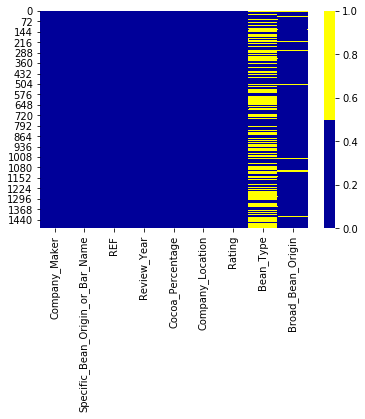

In [5]:
#Missing Data Heatmap
print("Visualise Missing Values - Missing Value Heatmap")
cols = dataset.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

#### 1.3)  Correct Data

In [6]:
#########################################################################################################################
#Clean up Cocoa_Percentage column to change from string to numeric as these have a percentage sign in them
#REFERENCE https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/
#REFERENCE https://www.kite.com/python/answers/how-to-convert-a-column-of-objects-to-strings-in-a-pandas-dataframe-in-python
dataset['Cocoa_Percentage'] = dataset['Cocoa_Percentage'].astype(str).str.replace("%","").str.replace(" ","") #strip out % and space
dataset['Cocoa_Percentage'] = pd.to_numeric(dataset['Cocoa_Percentage'])/100  #convert to numeric and make it a percentage by dividing by 100
print("*"*100)

****************************************************************************************************


In [7]:
dataset.isna().any()

Company_Maker                       False
Specific_Bean_Origin_or_Bar_Name    False
REF                                 False
Review_Year                         False
Cocoa_Percentage                    False
Company_Location                    False
Rating                              False
Bean_Type                            True
Broad_Bean_Origin                    True
dtype: bool

In [8]:
#########################################################################################################################
###########  FILL MISSING VALUES  ##########################
## REFERENCE https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
## More than 50% of data is missing from Bean_Type column.
#Can drop column as high percentage missing, but will fill with "Unknown"
#See appendix 1 for original attempts to fill based off a KNN-imputer but this gave some errors
dataset['Bean_Type'] = dataset['Bean_Type'].fillna('Unknown')

## 62 rows of data are missing a Broad_Bean_Origin
#Visual inspection in above table noted one row had 'Madagascar' as specific bean origin so replace with that value
dataset.at[750, 'Broad_Bean_Origin'] = 'Madagascar'

#Clean up spelling errors and consolidate some values (e.g. for islands) to their country
def fixBroadBeanOrigin(Broad_Bean_Origin):

    broadBeanDictionary = {'Domincan Republic': 'Dominican Republic', 'Principe' : 'Sao Tome & Principe', 'Sao Tome':'Sao Tome & Principe',
                           'Trinidad':'Trinidad-Tobago','Trinidad, Tobago' : 'Trinidad-Tobago'}
   
    try:
        if Broad_Bean_Origin in  broadBeanDictionary:
            Broad_Bean_Origin = broadBeanDictionary.get(Broad_Bean_Origin)
        return Broad_Bean_Origin
    except:
        return ("Unknown - No Match")

dataset['Broad_Bean_Origin']= dataset.apply(lambda row: fixBroadBeanOrigin(row.Broad_Bean_Origin) , axis = 1)

#Attempted filling null values using kNN but kept getting warning and error
#just fill with modal class (Venezuela)
#REFERENCE https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893
#REFERENCE https://stackoverflow.com/questions/42789324/pandas-fillna-mode

modalCategory = dataset['Broad_Bean_Origin'].mode()[0]
print('Modal category for Broad_Bean_Origin is: ' + modalCategory)
dataset['Broad_Bean_Origin'] = dataset['Broad_Bean_Origin'].fillna(modalCategory)
print("The number of columns with missing values is " + str(dataset.isnull().any().sum())) #determine how many columns have 
print("The number of rows with missing values is " + str(dataset.isnull().any(axis = 1).sum())) #determine how many rows have missing values
print("The number of missing values is " + str(dataset.isnull().sum().sum())) # Total number of missing values 
print("*"*100)
print("Check columns for missing values: ") 
dataset.isna().any()

Modal category for Broad_Bean_Origin is: Venezuela
The number of columns with missing values is 0
The number of rows with missing values is 0
The number of missing values is 0
****************************************************************************************************
Check columns for missing values: 


Company_Maker                       False
Specific_Bean_Origin_or_Bar_Name    False
REF                                 False
Review_Year                         False
Cocoa_Percentage                    False
Company_Location                    False
Rating                              False
Bean_Type                           False
Broad_Bean_Origin                   False
dtype: bool

In [9]:
#########################################################################################################################
# Clean up Company Location converting cities and countries into their ISO country name
# The list of company locations was checked against the ISO country names as imported from the pycountry library
# These dictionary key: value pairs were for those company locations which did not exist on that list
# The Dominican Republic seemed to be the only one that was mispelled, noting that Vietnam is Viet Nam in the ISO country name
# The pycountry code which was actually used to do this is at the bottom of this script as it required additional libraries to 
# be installed and not all team members had it as it is not a part of standard Anaconda install

def convertToISOCountry(companyLocation):
    countriesToCleanDictionary = {'U.S.A.': 'United States', 'U.K.' : 'United Kingdom', 'Scotland':'United Kingdom','Vietnam':'Viet Nam',
                                 'Amsterdam' : 'Netherlands', 'Venezuela': 'Venezuela, Bolivarian Republic of', 'Czech Republic' : 'Czechia',
                                 'Domincan Republic':'Dominican Republic', 'South Korea' : 'Korea, Republic of',
                                 'Bolivia':'Bolivia, Plurinational State of', 'Russia' : 'Russian Federation', 'St. Lucia' : 'Saint Lucia'
                                 ,'Wales': 'United Kingdom', 'Sao Tome' : 'Sao Tome and Principe'}   
    try:
        if companyLocation in  countriesToCleanDictionary:
            companyLocation = countriesToCleanDictionary.get(companyLocation)
        return companyLocation
    except:
        return companyLocation

#Apply the fix to the countries to convert them to their ISO Country name
#This creates a few less unique values
dataset['Company_Location'] = dataset.apply(lambda row: convertToISOCountry(row.Company_Location) , axis = 1)
dataset.head(5)


Company_Maker            Specific_Bean_Origin_or_Bar_Name  \
0                   Valrhona                                     Manjari   
1  Original Beans (Felchlin)  Grand Cru Blend No.1, 5 yr. Anniversary Ed   
2                    Potomac                               Upala w/ nibs   
3                 Middlebury                   Matagalpa, Cacao Bisiesto   
4          Carlotta Chocolat                                       Cesar   

    REF  Review_Year  Cocoa_Percentage Company_Location  Rating  \
0   129         2007              0.64           France    4.00   
1  1442         2014              0.80      Switzerland    3.25   
2   647         2011              0.70    United States    3.50   
3  1538         2015              0.70    United States    3.50   
4  1888         2016              0.65         Colombia    3.50   

             Bean_Type Broad_Bean_Origin  
0  Criollo, Trinitario        Madagascar  
1                Blend         Venezuela  
2               Matina        Costa Rica  
3              Unknown         Nicaragua  
4                CCN51          Colombia

#### 1.4)  Check Data for Duplicate Values

In [10]:
#########################################################################################################################
#Remove any duplicate rows
print('No of rows in data set that are duplicated after cleaning is: ' + str(dataset.duplicated().sum()))
print("*"*50)
print("***DUPLICATE ROW DETAILS***")
print(dataset[dataset.duplicated(keep = "first") == True]) #show duplicate rows
print("*"*50)
print('No of rows in data set before dropping duplicates is: ' + str(len(dataset)))
dataset.drop_duplicates(inplace = True)
print('No of rows in data set after dropping duplicates is: ' + str(len(dataset)))
print('Shape of data after dropping duplicates is: ' + str(dataset.shape))

No of rows in data set that are duplicated after cleaning is: 0
**************************************************
***DUPLICATE ROW DETAILS***
Empty DataFrame
Columns: [Company_Maker, Specific_Bean_Origin_or_Bar_Name, REF, Review_Year, Cocoa_Percentage, Company_Location, Rating, Bean_Type, Broad_Bean_Origin]
Index: []
**************************************************
No of rows in data set before dropping duplicates is: 1500
No of rows in data set after dropping duplicates is: 1500
Shape of data after dropping duplicates is: (1500, 9)


### Print Cleaned Dataframe (unencoded)

In [11]:
#print / display the original dataset
dataset

Company_Maker  \
0                                    Valrhona   
1                   Original Beans (Felchlin)   
2                                     Potomac   
3                                  Middlebury   
4                           Carlotta Chocolat   
5                                     Salgado   
6                                 Cacao Store   
7                               Kaoka (Cemoi)   
8                                   Woodblock   
9                                    Dormouse   
10                                       Soma   
11                              Mast Brothers   
12                        Bittersweet Origins   
13                        Chocolate Tree, The   
14                              Mast Brothers   
15                                   Mayacama   
16                                   Fruition   
17                                       Mars   
18                                     Fresco   
19                Tablette (aka Vanillabeans)   
20            Compania de Chocolate (Salgado)   
21                                     Pralus   
22                                  Coppeneur   
23                     Chchukululu (Tulicorp)   
24                             Black Mountain   
25                                     Bonnat   
26                                       hexx   
27                                  Askinosie   
28                                      Danta   
29                         Quetzalli (Wolter)   
30                                       K'ul   
31                        Chocolats Privilege   
32                                  Momotombo   
33         Republica del Cacao (aka Confecta)   
34                                      Tejas   
35                       Svenska Kakaobolaget   
36                              Benoit Nihant   
37                                       Soma   
38                                  Coppeneur   
39                                     Amedei   
40                             Chloe Chocolat   
41                                Montecristi   
42                                     Domori   
43                             Guido Castagna   
44                                      Madre   
45                             Emerald Estate   
46                                  Starchild   
47                                   Lonohana   
48                        Bittersweet Origins   
49                                     Fresco   
50                                   Ah Cacao   
51                                      Madre   
52                                       TCHO   
53                                     Fresco   
54                                     Fresco   
55                                   Valrhona   
56                                 Violet Sky   
57                                Cacao Store   
58                                    Mission   
59                               French Broad   
60                                   Valrhona   
61                                        Kto   
62                                  Coppeneur   
63                                       Theo   
64                                       Kyya   
65                                      Madre   
66                                Letterpress   
67                                       Soma   
68                                       Ocho   
69                        Chocolate Tree, The   
70                                     Sirene   
71                            Palette de Bine   
72                                       Ocho   
73                                      Arete   
74                                     Pralus   
75                                  Dandelion   
76                              Georgia Ramon   
77                                      Malmo   
78                                     Bright   
79                              Garden Island   
80                                       Kyya   
81            

### Encoding of Variables - Try two different methods and see which gives better results

In [12]:
##########################################################################################################################
######################################## REMOVE FEATURES TO PREPARE FOR ENCODING##########################################
##########################################################################################################################
# Drop features prior to encoding (REF and Review Year highly correlated so drop Review_Year)
priorToEncodingDataset = dataset.copy()
priorToEncodingDataset.drop(columns =['Review_Year'], inplace = True)
priorToEncodingDataset.head()

Company_Maker            Specific_Bean_Origin_or_Bar_Name  \
0                   Valrhona                                     Manjari   
1  Original Beans (Felchlin)  Grand Cru Blend No.1, 5 yr. Anniversary Ed   
2                    Potomac                               Upala w/ nibs   
3                 Middlebury                   Matagalpa, Cacao Bisiesto   
4          Carlotta Chocolat                                       Cesar   

    REF  Cocoa_Percentage Company_Location  Rating            Bean_Type  \
0   129              0.64           France    4.00  Criollo, Trinitario   
1  1442              0.80      Switzerland    3.25                Blend   
2   647              0.70    United States    3.50               Matina   
3  1538              0.70    United States    3.50              Unknown   
4  1888              0.65         Colombia    3.50                CCN51   

  Broad_Bean_Origin  
0        Madagascar  
1         Venezuela  
2        Costa Rica  
3         Nicaragua  
4          Colombia

In [13]:
# When the target "Rating" was a float the machine learning models had an issue, so converting them to integer
priorToEncodingDataset['Rating'] = priorToEncodingDataset['Rating'].map({1.0 : 0, 1.5 : 1, 1.75 : 2, 2.0 : 3, 2.25 : 4,  
                                                      2.5 : 5, 2.75 : 6, 3.0 : 7, 3.25 : 8, 3.5 : 9, 
                                                     3.75 : 10, 4.0 : 11, 5.0 : 12}).astype(int)
# priorToEncodingDataset'Rating'].replace(1.00,1 ,inplace= True)
# priorToEncodingDataset'Rating'].replace(1.50,2 ,inplace= True)
# priorToEncodingDataset'Rating'].replace(1.75,3 ,inplace= True)
# priorToEncodingDataset'Rating'].replace(2.00,4 ,inplace= True)
# priorToEncodingDataset'Rating'].replace(2.25,5 ,inplace= True)
# priorToEncodingDataset'Rating'].replace(2.50,6 ,inplace= True)
# priorToEncodingDataset'Rating'].replace(2.75,7 ,inplace= True)
# priorToEncodingDataset'Rating'].replace(3.00,8 ,inplace= True)
# priorToEncodingDataset['Rating'].replace(3.25,9 ,inplace= True)
# priorToEncodingDataset['Rating'].replace(3.50,10 ,inplace= True)
# priorToEncodingDataset['Rating'].replace(3.75,11 ,inplace= True)
# priorToEncodingDataset['Rating'].replace(4.00,12 ,inplace= True)
# priorToEncodingDataset['Rating'].replace(5.00,13 ,inplace= True)
# priorToEncodingDataset['Rating']= priorToEncodingDataset['Rating'].astype(int)
priorToEncodingDataset.head(5)

Company_Maker            Specific_Bean_Origin_or_Bar_Name  \
0                   Valrhona                                     Manjari   
1  Original Beans (Felchlin)  Grand Cru Blend No.1, 5 yr. Anniversary Ed   
2                    Potomac                               Upala w/ nibs   
3                 Middlebury                   Matagalpa, Cacao Bisiesto   
4          Carlotta Chocolat                                       Cesar   

    REF  Cocoa_Percentage Company_Location  Rating            Bean_Type  \
0   129              0.64           France      11  Criollo, Trinitario   
1  1442              0.80      Switzerland       8                Blend   
2   647              0.70    United States       9               Matina   
3  1538              0.70    United States       9              Unknown   
4  1888              0.65         Colombia       9                CCN51   

  Broad_Bean_Origin  
0        Madagascar  
1         Venezuela  
2        Costa Rica  
3         Nicaragua  
4          Colombia

In [14]:
##########################################################################################################################
### ENCODE DATASET AND PREPARE FOR MACHINE LEARNING MODELS VIA DUMMY ENCODING ACROSS ALL NON-DELETED COLUMNS
##########################################################################################################################
##Encoding method and dummy variables here
##Will likely need some feature engineering and reduction in dimensionality of input variables

#Dummy encoding of variables using dropping rating year as highly correlated to REF
print('Prior to encoding dataset shape is ' + str(priorToEncodingDataset.shape))
dummyEncodedDataset = pd.get_dummies(priorToEncodingDataset, prefix_sep='_')
print('After encoding dataset shape is ' + str(dummyEncodedDataset.shape))
print('Dummy encoded dataset : ' + str(dummyEncodedDataset.shape))
display(dummyEncodedDataset)

Prior to encoding dataset shape is (1500, 8)
After encoding dataset shape is (1500, 1464)
Dummy encoded dataset : (1500, 1464)


REF  Cocoa_Percentage  Rating  Company_Maker_A. Morin  \
0      129             0.640      11                       0   
1     1442             0.800       8                       0   
2      647             0.700       9                       0   
3     1538             0.700       9                       0   
4     1888             0.650       9                       0   
5      292             0.700       9                       0   
6     1684             0.700       7                       0   
7      404             0.700       6                       0   
8     1042             0.700       9                       0   
9     1676             0.800       6                       0   
10     387             0.700      10                       0   
11     572             0.700       8                       0   
12     565             0.700       7                       0   
13     919             0.680       6                       0   
14     959             0.730       9                       0   
15    1728             0.720       7                       0   
16    1780             0.740      11                       0   
17     537             0.650       7                       0   
18     642             0.700       8                       0   
19    1450             0.600       8                       0   
20     292             0.700      10                       0   
21      40             0.750       9                       0   
22     558             0.720       5                       0   
23     486             0.550       6                       0   
24     256             0.700       7                       0   
25    1912             0.750       9                       0   
26    1550             0.730       8                       0   
27     661             0.700      10                       0   
28     987             0.700      10                       0   
29    1796             0.700       6                       0   
30    1852             0.700       6                       0   
31    1219             0.700       5                       0   
32     661             0.700       6                       0   
33     147             0.670       9                       0   
34     829             0.700       7                       0   
35    1618             0.700       6                       0   
36     757             0.720      11                       0   
37     951             0.700       9                       0   
38     196             0.720       7                       0   
39     170             0.630       9                       0   
40     672             0.700       9                       0   
41    1654             0.630       9                       0   
42     272             0.700      10                       0   
43     355             0.640       7                       0   
44    1085             0.700       6                       0   
45    1137             0.600       6                       0   
46    1692             0.700       7                       0   
47    1097             0.720       7                       0   
48     431             0.650       9                       0   
49    1149             0.700      11                       0   
50     316             0.700       7                       0   
51     995             0.700       8                       0   
52     915             0.990       8                       0   
53     370             0.700       8                       0   
54     370             0.700       7                       0   
55     395             0.680       9                       0   
56    1458             0.770       8                       0   
57    1684             0.700       9                       0   
58    1880             0.750      10                       0   
59    1209             0.800       7                       0   
60     757             0.640      11                       0   
61    1422             0.720       6   

In [15]:
##########################################################################################################################
### ENCODE DATASET AND PREPARE FOR MACHINE LEARNING MODELS VIA lABEL ENCODING METHOD
##########################################################################################################################
##Convert categorical columns to numeric using LabelEncoder
##Will likely need some feature engineering and reduction in dimensionality of input variables

print('Prior to encoding dataset shape is ' + str(priorToEncodingDataset.shape))

#Bin the cocoa_percentage and use that instead
#https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#7559
#priorToEncodingDataset['Cocoa_Percentage_Bin'] = pd.cut(priorToEncodingDataset['Cocoa_Percentage'], bins=[0,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.05], labels=[0.05,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
#dummy encode columns with unique value counts under 50 
#mixedEncodedDataset = pd.get_dummies(priorToEncodingDataset, prefix_sep='_', columns=['Company_Location_Continent'])

#Label encoding
#REF https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
mixedEncodedDataset = priorToEncodingDataset.copy()
mixedEncodedDataset['Company_Maker'] = labelencoder.fit_transform(mixedEncodedDataset['Company_Maker'])
mixedEncodedDataset['Specific_Bean_Origin_or_Bar_Name'] = labelencoder.fit_transform(mixedEncodedDataset['Specific_Bean_Origin_or_Bar_Name'])
mixedEncodedDataset['Broad_Bean_Origin'] = labelencoder.fit_transform(mixedEncodedDataset['Broad_Bean_Origin'])
mixedEncodedDataset['Company_Location'] = labelencoder.fit_transform(mixedEncodedDataset['Company_Location'])
mixedEncodedDataset['Bean_Type'] = labelencoder.fit_transform(mixedEncodedDataset['Bean_Type'])
print('After label encoding dataset shape is ' + str(mixedEncodedDataset.shape))
print('After dummy encoding dataset : ' + str(dummyEncodedDataset.shape))
display(mixedEncodedDataset)

Prior to encoding dataset shape is (1500, 8)
After label encoding dataset shape is (1500, 8)
After dummy encoding dataset : (1500, 1464)


Company_Maker  Specific_Bean_Origin_or_Bar_Name   REF  Cocoa_Percentage  \
0               365                               495   129             0.640   
1               275                               331  1442             0.800   
2               291                               852   647             0.700   
3               238                               524  1538             0.700   
4                63                               166  1888             0.650   
5               312                               696   292             0.700   
6                55                               477  1684             0.700   
7               188                               575   404             0.700   
8               379                               328  1042             0.700   
9               119                               203  1676             0.800   
10              330                               589   387             0.700   
11              228                               268   572             0.700   
12               34                               728   565             0.700   
13               82                               638   919             0.680   
14              228                               764   959             0.730   
15              231                               362  1728             0.720   
16              148                               232  1780             0.740   
17              225                               527   537             0.650   
18              145                               388   642             0.700   
19              347                               865  1450             0.600   
20               94                               589   292             0.700   
21              292                               210    40             0.750   
22               97                               458   558             0.720   
23               69                                54   486             0.550   
24               35                               526   256             0.700   
25               38                               760  1912             0.750   
26              387                               282  1550             0.730   
27               20                               226   661             0.700   
28              106                               470   987             0.700   
29              296                               539  1796             0.700   
30              184                               513  1852             0.700   
31               83                               881  1219             0.700   
32              246                               548   661             0.700   
33              302                               292   147             0.670   
34              350                               144   829             0.700   
35              343                               783  1618             0.700   
36               31                                77   757             0.720   
37              330                               131   951             0.700   
38               97                               732   196             0.720   
39               14                               824   170             0.630   
40               71                               101   672             0.700   
41              249                               492  1654             0.630   
42              118                               373   272             0.700   
43              156                                54   355             0.640   
44              210                               685  1085             0.700   
45              129                               300  1137             0.600   
46              337                               362  1692             0.700   
47              205                               604  1097             0.720   
48               34                  

# 2. Formulate the problem as a machine learning task.

A data science process was conducted to develop three supervised machine learning classification models to handle a multi-class classification problem.  The problem derived from a dataset containing expert ratings of chocolate, which looks to predict what rating a specific dark chocolate sample would be given, based on a scale from 1 Unpleasant (mostly unpalatable) to 5 Elite (Transcending beyond the ordinary limits).  The ratings are discrete, with values in 0.25 increments between 1 and 5 inclusive.

Whilst the final expert ratings are driven by factors such as flavour, texture, aftermelt and overall opinion, none of these features are present in the dataset.  Eight features were available in the dataset, including the Company/Maker, Specific Bean Origin, REF (a value indicating when the review was entered into the database with a higher value indicating a more recent entry), Review Year, Cocoa Percentage, Company Location, Bean Type, and Broad Bean Origin.  The final column of the original dataset is the Rating column, which represents the label to be predicted.  A number of Python packages were utilised via Jupyter Notebooks to aid in the data extraction, manipulation and cleansing, as well as the data exploration, visualisation, and model development and training.  


# 3. Select three learning algorithms based on the previous task
### Identify the corresponding hyperparameters if any. There must be at least one hyperparameter

The three supervised machine learning models that have been chosen to compare in order to work out which model gives the best results for predicting the rating classification are:

#### Model 1 - K-Nearest Neighbours Classifier
* The hyperparameter that will be investigated and tuned for this model will be the n_neighbors parameter, which controls how many nearest neighbours to compare to in order to try and determine a value to assign.  

- We look at n_neighbors ranging from 1 to 10 and then increment in 10's up to 400

#### Model 2 - Random Forest Classifier
* There are a number of hyperparameters available in a random forest.  Here we are tuning two at the same time, the n_estimators hyperparameter, which controls the number of trees in the forest and the max_features which controls the number of features to consider when looking for the best split.    

- We look at n_estimators ranging from 1 to 100 in increments of 5
- We look at max_features ranging from 1 to 3 in increments of 1

#### Model 3 - Decision Tree Classifier
* The hyperparameter that will be investigated and tuned for this model will be the max_depths parameter, which controls how much expansion of the nodes occurs (i.e. how much the tree is allowed to grow)

- We look at max_depths ranging from 1 to 8 in increments of 1


# 4. Perform data partitioning.
#### This will split the data into the training data and the test data. The training data will be used for **model development**, with the test data for **performance evauation**

#### 4.1 Select features and encoding to include in X as model inputs

In [16]:
############################################################################################################################
#load the modified dataframe excluding the Rating column for the independent variables (X)
#mixedEncodedDataset or dummyEncodedDataset
modelDataset = mixedEncodedDataset.copy()

X = modelDataset.drop(['Rating'],axis=1).values  #.values changes the data type from pandas data frame.  This drops the income-target column from the table
y = modelDataset['Rating'].values #include just the target variable in the dependent variable y
############################################################################################################################
print(X)
print(y)

[[ 365.  495.  129. ...   15.   14.   41.]
 [ 275.  331. 1442. ...   49.    3.   80.]
 [ 291.  852.  647. ...   51.   24.   13.]
 ...
 [ 156.  100.  355. ...   26.   35.   76.]
 [ 377.  351.  593. ...   50.   35.   80.]
 [ 172.  635. 1654. ...   50.   35.   66.]]
[11  8  9 ...  8  9  6]


#### 4.2 Split Data into training/testing

In [17]:
#REF https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split
#Set test_size = 0.2 to split this 20% for testing and 80% for training
#random_state is set so that testing can be consistent between runs
testSize = 0.2
#Do the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=12)

#Scale the X values to ensure a variable doesn't dominate just because of its range and assign back to X_train
#standardScaler = StandardScaler()
minMaxScaler = MinMaxScaler(feature_range=(0,1)) 

X_train = minMaxScaler.fit_transform(X_train)

print('Shapes of samples are: X_train ' + str(X_train.shape) + ', X_test ' + str(X_test.shape) + ', y_train ' + 
      str(y_train.shape) + ', y_test ' + str(y_test.shape))

#Scale the X values in the test data as the training data had the scaler applied so the test data needs to too
#The values obtained from the training scaling are applied here (no .fit as we are just applying the transformation)
X_test = minMaxScaler.transform(X_test) 
print(X_test) #Check the data was scaled - commented out after checking

Shapes of samples are: X_train (1200, 7), X_test (300, 7), y_train (1200,), y_test (300,)
[[0.50769231 0.97530864 0.36363636 ... 0.24528302 1.         0.22093023]
 [0.61025641 0.02693603 0.45300462 ... 0.96226415 0.17142857 0.03488372]
 [0.93589744 0.74747475 0.08063688 ... 0.28301887 0.31428571 0.93023256]
 ...
 [0.80769231 0.46801347 0.01797637 ... 0.96226415 0.08571429 0.29069767]
 [0.44358974 0.9315376  0.53055984 ... 0.94339623 0.77142857 0.8372093 ]
 [0.53846154 0.29292929 0.34257833 ... 0.96226415 1.         0.20930233]]


#### 4.3 Print the training data and the test data

In [18]:
print('#'*50)
print('Printing training and testing data')
print('#'*50)
print ('X_train:')
print (X_train)
print('*'*50)
print ('y_train:')
print (y_train)
print('*'*50)
print ('X_test:')
print (X_test)
print('*'*50)
print ('y_test:')
print (y_test)
print('*'*50)
print('Shapes: ')
print('X_train shape is ' + str(X_train.shape))
print('y_train shape is ' + str(y_train.shape))
print('X_test shape is ' + str(X_test.shape))
print('y_test shape is ' + str(y_test.shape))

##################################################
Printing training and testing data
##################################################
X_train:
[[0.37692308 0.47138047 0.86029789 ... 0.20754717 1.         0.53488372]
 [0.34358974 0.31649832 0.65228557 ... 0.96226415 1.         0.22093023]
 [0.84615385 0.84287318 0.54853621 ... 0.11320755 0.77142857 0.8372093 ]
 ...
 [0.45384615 0.47923681 0.41910632 ... 0.96226415 1.         0.20930233]
 [0.06666667 0.85634119 0.99794556 ... 0.94339623 1.         0.5       ]
 [0.84615385 0.37710438 0.34463277 ... 0.11320755 0.77142857 0.3372093 ]]
**************************************************
y_train:
[ 7  9 10 ...  8  8  6]
**************************************************
X_test:
[[0.50769231 0.97530864 0.36363636 ... 0.24528302 1.         0.22093023]
 [0.61025641 0.02693603 0.45300462 ... 0.96226415 0.17142857 0.03488372]
 [0.93589744 0.74747475 0.08063688 ... 0.28301887 0.31428571 0.93023256]
 ...
 [0.80769231 0.46801347 0.01797637 ... 0.96

# 5. Code for model development

In this section we do hyperparameter tuning of the chosen hyperparameter(s) for the models.  These are done using k-fold cross validation, either through one of two scikit learn model selection packages, either the cross_val_score package, or in the case of the random forest classifier, via the GridSearchCV package, which we use to try and find the best combination of n_estimators and max_features.

Once we have determined the optimal hyperparameter(s) for the given model, these are then used as the parameters of another model of the same type.  The model with the optimised hyperparameters is then tested using the cross_val_score package to test the model's predictive abilities on a 3-5 K-fold on the training data.  Based on the mean accuracy value of these tests from each model (L), a model (M) is selected.

## Hyperparameters

#### Model 1 - K-Nearest Neighbours Classifier
* We are tuning the **n_neighbors** parameter, which controls how many nearest neighbours to compare to for classification
- We look at n_neighbors ranging from 1 to 10 and then increment in 10's up to 400

#### Model 2 - Random Forest Classifier
* We are tuning two at the same time using GridSearchCV.  
* The two hyperparameters are:
    - **n_estimators** hyperparameter, which controls the number of trees in the forest
    - **max_features** which controls the number of features to consider when looking for the best split.    
- We look at n_estimators ranging from 1 to 100 in increments of 5
- We look at max_features ranging from 1 to 3

#### Model 3 - Decision Tree Classifier
* We are tuning the **max_depths** parameter, which controls how much expansion of the nodes occurs (i.e. how much the tree is allowed to grow)
- We look at max_depths ranging from 1 to 8 in increments of 1

### 5. (i)  Machine Learning Model 1 - K-Nearest Neighbours Classifier

k =  1 : Accuracy Score Mean: 0.18166666666666664
**************************************************
k =  2 : Accuracy Score Mean: 0.17666666666666667
**************************************************
k =  3 : Accuracy Score Mean: 0.16833333333333333
**************************************************
k =  4 : Accuracy Score Mean: 0.17
**************************************************
k =  5 : Accuracy Score Mean: 0.16833333333333333
**************************************************
k =  6 : Accuracy Score Mean: 0.16666666666666666
**************************************************
k =  7 : Accuracy Score Mean: 0.18083333333333332
**************************************************
k =  8 : Accuracy Score Mean: 0.19083333333333333
**************************************************
k =  10 : Accuracy Score Mean: 0.19083333333333333
**************************************************
k =  30 : Accuracy Score Mean: 0.1958333333333333
**************************************************
k = 

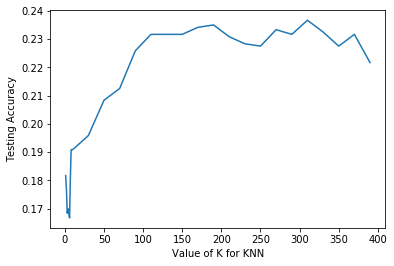

In [19]:
# #########################################################################################################################
# #####################################  HYPERPARAMETER TUNING  ###########################################################
# #########################################################################################################################
#Hyperparameter tuning
#REF https://medium.datadriveninvestor.com/k-fold-cross-validation-for-parameter-tuning-75b6cb3214f

neighbors = list(range(1,9)) + list(range(10, 400,20))  #get numbers 1 to 9 and then from 10 to 399 in increments of 20

nFolds = 3
cv_scores =[]
for k in neighbors:
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) #training
    scores = cross_val_score(knn, X_train, y_train, cv=nFolds)
    y_pred = knn.predict(X_train) #predict
    cv_scores.append(scores.mean())
    print('k = ',k,':', end = " ")
    print("Accuracy Score Mean:",scores.mean())
    print("*"*50)

#the best K value based on hyperparameters tested using the training set which was broken into 3 folds (2 training, 1 validation)
k_best = neighbors[np.argmax(cv_scores)] 
print ('cv_scores:', cv_scores)
print("*"*50)
print ("K-best was ",k_best) #Print the value of the best k
print("*"*100)

#visualise best K
plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')

print("*"*100)

# #########################################################################################################################
# #####################################  GET MEAN ACCURACY FROM BEST NEAREST NEIGHBOUR ###################################
# ########################################################################################################################
#get final performance of model using k-best and cross_val_score on 3-folds
knnBest =KNeighborsClassifier(n_neighbors = k_best)
scores = cross_val_score(knnBest, X_train, y_train, cv=nFolds, scoring='accuracy')
cv_scores.append(scores.mean())
print (scores)

plt.ylabel('Testing Accuracy')
#predict testing set
knn =KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_train, y_train)#training
y_predR = knn.predict(X_test)
acc_2 = metrics.accuracy_score(y_test, y_predR)
print("*"*100)
print("Accuracy for testing set is:",acc_2)
knn_m = confusion_matrix(y_test, y_predR)
print(knn_m)
print("*"*100)

#REF https://stackoverflow.com/questions/47257952/how-to-get-average-score-of-k-fold-cross-validation-with-sklearn
#get average score from this model
print("*"*100)
kNNavg_score = np.mean(scores)
print("AVERAGE ACCURACY SCORE FOR KNN-MODEL USING ", k_best, "NEAREST NEIGHBOURS BASED ON " ,nFolds, "-FOLDS CROSS VALIDATION IS", kNNavg_score)
print("*"*100)


#It perform well on validation set not, real testing set.
#NOTE: performance on Y as a numeric perform more precisely

### 5. (ii)  Machine Learning Model 2 - Random Forest Classifier

In [20]:
# ########################################################################################################################
# #####################################  HYPERPARAMETER TUNING ############################################################
# ########################################################################################################################

#REF https://www.youtube.com/watch?v=jUxhUgkKAjE
#REF https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
#uses grid search to tune two hyperparameters at once n_estimators and max_features_range
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
max_features_range = np.arange(1,4,1)
n_estimators_range = np.arange(1,100,5)

param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid= param_grid, cv=3)
grid.fit(X_train,y_train)
print("The best parameters are %s with a score of %0.2f" 
      % (grid.best_params_, grid.best_score_))

#REF https://stackoverflow.com/questions/58835592/result-of-gridsearchcv-as-table
#REF https://www.youtube.com/watch?v=jUxhUgkKAjE
print("Dataframe of the grid search parameters and their average score")
gridSearchCVResults = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
display(gridSearchCVResults)

# #########################################################################################################################
# #The code below is to make this into a contour plot but requires plotly so have just commented it so the script
# won't error at this point but it is available for future reference
# #Prepare data for making into a contour plot
# gridForContour = gridSearchCVResults.groupby(['max_features','n_estimators']).mean()
# display(gridForContour)

# #Pivot the data
# resetGrid = gridForContour.reset_index()
# resetGrid.columns = ['max_features', 'n_estimators', 'Accuracy']
# pivotedGrid = resetGrid.pivot('max_features', 'n_estimators')
# display(pivotedGrid)
# x = pivotedGrid.columns.levels[1].values
# y = pivotedGrid.index.values
# z = pivotedGrid.values


# ##Plot the 2D contour plot
# ##Requires plotly to chart so will comment code
# # import plotly.graph_objects as go

# # # X and Y axes labels
# # layour = go.Layout(xaxis-go.layout.XAxis(title=go.layout.xaxis.Title(text="max_features")),
# #                    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="n_estimators"))
# #                   )

# # fig = go.Figure(data = [go.Contour(z=z, x=x,y=y)], layout = layout)
# # fig.update_layout(title="Hyperparameter Tuning of Random Forest", autosize =false,
# #                   width = 500, height = 500, 
# #                   margin=dict(l=65, r=50, b=65, t=90))

# # fig.show()



The best parameters are {'max_features': 3, 'n_estimators': 41} with a score of 0.23
Dataframe of the grid search parameters and their average score


max_features  n_estimators  Accuracy
0              1             1  0.173333
1              1             6  0.185833
2              1            11  0.200000
3              1            16  0.209167
4              1            21  0.206667
5              1            26  0.206667
6              1            31  0.219167
7              1            36  0.210833
8              1            41  0.212500
9              1            46  0.218333
10             1            51  0.223333
11             1            56  0.220833
12             1            61  0.205833
13             1            66  0.224167
14             1            71  0.204167
15             1            76  0.218333
16             1            81  0.215833
17             1            86  0.211667
18             1            91  0.214167
19             1            96  0.210000
20             2             1  0.156667
21             2             6  0.179167
22             2            11  0.196667
23             2            16  0.212500
24             2            21  0.202500
25             2            26  0.213333
26             2            31  0.215833
27             2            36  0.229167
28             2            41  0.218333
29             2            46  0.226667
30             2            51  0.215000
31             2            56  0.219167
32             2            61  0.215833
33             2            66  0.213333
34             2            71  0.207500
35             2            76  0.220000
36             2            81  0.220833
37             2            86  0.218333
38             2            91  0.226667
39             2            96  0.219167
40             3             1  0.182500
41             3             6  0.191667
42             3            11  0.209167
43             3            16  0.221667
44             3            21  0.202500
45             3            26  0.210000
46             3            31  0.226667
47             3            36  0.211667
48             3            41  0.231667
49             3            46  0.214167
50             3            51  0.221667
51             3            56  0.221667
52             3            61  0.210833
53             3            66  0.212500
54             3            71  0.219167
55             3            76  0.212500
56             3            81  0.214167
57             3            86  0.227500
58             3            91  0.216667
59             3            96  0.211667

In [21]:
# #########################################################################################################################
# ########################  GET MEAN ACCURACY FOR BEST N_ESTIMATORS AND MAX_FEATURES #####################################
# ########################################################################################################################

print(grid.best_params_)
maxFeatures = grid.best_params_.get('max_features')
nEstimators = grid.best_params_.get('n_estimators')
nFolds = 3

#get final validation performance of model using k-best and cross_val_score on 3-folds
rfClassifierBest = RandomForestClassifier(max_features = maxFeatures, n_estimators = nEstimators)
rfScores = cross_val_score(rfClassifierBest, X_train, y_train, cv=nFolds, scoring='accuracy')
cv_scores.append(rfScores.mean())
print(rfScores)

#predict testing set
rfTest = RandomForestClassifier(max_features = maxFeatures, n_estimators = nEstimators, random_state=14)
rfTest.fit(X_train, y_train) #training
y_predR = rfTest.predict(X_test)
acc_2 = metrics.accuracy_score(y_test, y_predR)
print("*"*100)
print("Accuracy for testing set is:",acc_2)
rf_m = confusion_matrix(y_test, y_predR)
print(rf_m)
print("*"*100)

#REF https://stackoverflow.com/questions/47257952/how-to-get-average-score-of-k-fold-cross-validation-with-sklearn
#get average score from this model
print("*"*100)
rfavg_score = np.mean(rfScores)
print("AVERAGE ACCURACY SCORE FOR RANDOM FOREST MODEL WITH ", maxFeatures, "MAX FEATURES AND", nEstimators, "N-ESTIMATORS BASED ON" ,nFolds, "-FOLDS CROSS VALIDATION IS", rfavg_score)
print("*"*100)

{'max_features': 3, 'n_estimators': 41}
[0.2075 0.2125 0.2075]
****************************************************************************************************
Accuracy for testing set is: 0.23333333333333334
[[ 0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  2  1  0  1  0  0]
 [ 0  0  1  0  1  1  3  0  2  0  0]
 [ 0  0  0  0  2  0  0  0  1  0  0]
 [ 0  0  1  0  2  7  7  3  4  0  0]
 [ 0  0  1  0  1 11 11 10  6  2  0]
 [ 0  0  0  0  1 13 19  8 23  3  3]
 [ 0  0  0  0  1  3  5 13 15 11  1]
 [ 0  1  0  0  3  6  8 11 19  7  2]
 [ 0  0  0  0  0  5  6  7  9  3  1]
 [ 0  0  0  0  0  1  0  1  1  5  2]]
****************************************************************************************************
****************************************************************************************************
AVERAGE ACCURACY SCORE FOR RANDOM FOREST MODEL WITH  3 MAX FEATURES AND 41 N-ESTIMATORS BASED ON 3 -FOLDS CROSS VALIDATION IS 0.20916666666666664
******************************************

### 5. (iii)  Machine Learning Model 3 - Decision Tree Classifier

i criteria =  1 :
Accuracy Score Mean: 0.23583333333333334
**************************************************
i criteria =  2 :
Accuracy Score Mean: 0.2316666666666667
**************************************************
i criteria =  3 :
Accuracy Score Mean: 0.22666666666666668
**************************************************
i criteria =  4 :
Accuracy Score Mean: 0.22583333333333333
**************************************************
i criteria =  5 :
Accuracy Score Mean: 0.22833333333333336
**************************************************
i criteria =  6 :
Accuracy Score Mean: 0.22666666666666666
**************************************************
i criteria =  7 :
Accuracy Score Mean: 0.22083333333333333
**************************************************
Accuracy : 0.19666666666666666
[[ 0  0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  3  0  0]
 [ 0  0  0  0  0  0  3  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  3  0 21  0  0]
 [ 0  0  0  0  0  0 

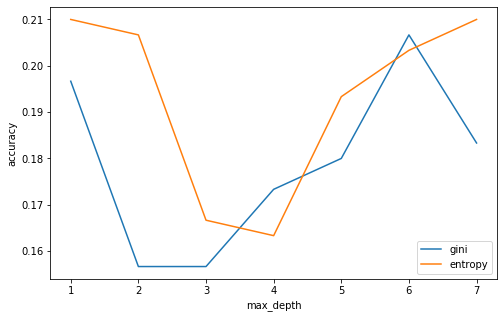

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
kf =KFold(n_splits=5, shuffle=True, random_state=14)

max_depth = []
acc_gini = []
acc_entropy = []
nFolds = 3

#Outputting accuracy by changing depth
for i in range(1,8):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dt_trained = dt.fit(X_train, y_train)
    y_pred = dt_trained.predict(X_test)
    scores = cross_val_score(dt, X_train, y_train, cv=nFolds)
    acc_gini.append(accuracy_score(y_test, y_pred))
    
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dt_trained = dt.fit(X_train, y_train)
    y_pred = dt_trained.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, y_pred))
    max_depth.append(i)
    
    print('i criteria = ',i,':')
    print("Accuracy Score Mean:",scores.mean())
    print("*"*50)

    d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
    
   
#visualizing changes in parameters
#https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752
plt.figure(figsize=(8,5))
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
#get hightest accuracy when using gini and max depth is 1/ entropy with 4 max_depth

dt = DecisionTreeClassifier(random_state=1, max_depth=1, criterion='gini')
dt_trained = dt.fit(X_train, y_train)
y_predR = dt_trained.predict(X_test)
acc_3 = accuracy_score(y_test, y_predR)
print("Accuracy :",acc_3)
cf_m = confusion_matrix(y_test, y_predR)
print(cf_m)
print("*"*100)

# #########################################################################################################################
# #####################################  HYPERPARAMETER TUNING BEST DEPTH #################################################
# #########################################################################################################################
depths = range(1, 8)
cv_scores = []
for maxDepth in depths:
    dt = DecisionTreeClassifier(max_depth = maxDepth)
    scores = cross_val_score(dt, X_train, y_train, cv=nFolds, scoring='accuracy')
    cv_scores.append(scores.mean())
    print (scores)
maxDepth_best = depths[np.argmax(cv_scores)] #Returns the indices of the maximum values along an axis.
print ('cv_scores:', cv_scores)
print ('Best Maximum Depth:', maxDepth_best)
print("*"*100)
#get final validation performance of model using k-best and cross_val_score on 3-folds
dtClassifierBest = DecisionTreeClassifier(max_depth = maxDepth_best)
dtScores = cross_val_score(dtClassifierBest, X_train, y_train, cv=nFolds, scoring='accuracy')
cv_scores.append(dtScores.mean())
print(dtScores)

#predict testing set
dtTest = DecisionTreeClassifier(max_depth = maxDepth_best, random_state=14)
dtTest.fit(X_train, y_train) #training
y_predR = dtTest.predict(X_test)
acc_2 = metrics.accuracy_score(y_test, y_predR)
print("*"*100)
print("Accuracy for testing set is:",acc_2)
#knn_m = confusion_matrix(y_test, y_predR)
#print(knn_m)
print("*"*100)

#REF https://stackoverflow.com/questions/47257952/how-to-get-average-score-of-k-fold-cross-validation-with-sklearn
#get average score from this model
print("*"*100)
dtavg_score = np.mean(dtScores)
print("AVERAGE ACCURACY SCORE FOR DECISION TREE MODEL WITH DEPTH OF", maxDepth_best, "BASED ON" ,nFolds, "-FOLDS CROSS VALIDATION IS", dtavg_score)
print("*"*100)


In [23]:
print("AVERAGE ACCURACY SCORE FOR KNN-MODEL USING ", k_best, "NEAREST NEIGHBOURS BASED ON " ,nFolds, "-FOLDS CROSS VALIDATION IS", kNNavg_score)
print("AVERAGE ACCURACY SCORE FOR RANDOM FOREST MODEL WITH ", maxFeatures, "MAX FEATURES AND", nEstimators, "N-ESTIMATORS BASED ON" ,nFolds, "-FOLDS CROSS VALIDATION IS", rfavg_score)
print("AVERAGE ACCURACY SCORE FOR DECISION TREE MODEL WITH DEPTH OF", maxDepth_best, "BASED ON" ,nFolds, "-FOLDS CROSS VALIDATION IS", dtavg_score)

AVERAGE ACCURACY SCORE FOR KNN-MODEL USING  310 NEAREST NEIGHBOURS BASED ON  3 -FOLDS CROSS VALIDATION IS 0.2366666666666667
AVERAGE ACCURACY SCORE FOR RANDOM FOREST MODEL WITH  3 MAX FEATURES AND 41 N-ESTIMATORS BASED ON 3 -FOLDS CROSS VALIDATION IS 0.20916666666666664
AVERAGE ACCURACY SCORE FOR DECISION TREE MODEL WITH DEPTH OF 1 BASED ON 3 -FOLDS CROSS VALIDATION IS 0.23583333333333334


K-Nearest Neighbours: 0.246000 (0.026365)
Random Forest: 0.206667 (0.013824)
Decision Tree: 0.243333 (0.029136)


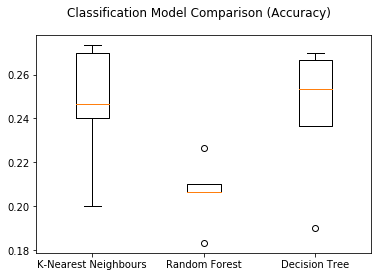

In [24]:
#Reference https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# The code below is mostly from the site above with minimal modification

models = []
#models.append(('Logistic Regression', LogisticRegression(solver='liblinear', C=0.05, random_state=0)))  #changed the parameters on this
#models.append(('Decision Tree', DecisionTreeClassifier(max_depth = 5)))
models.append(('K-Nearest Neighbours', knnBest)) 
models.append(('Random Forest', rfClassifierBest))
models.append(('Decision Tree', dtClassifierBest))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=9, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Classification Model Comparison (Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Accuracy scores for Model 1 using K-Nearest Neighbours was comparable to the decision tree model, with both usually producing above 23.5%.  The model selected for performance assessment (model M) is the K-Nearest Neighbours model 

# 6. Perform Performance Assessment

****************************************************************************************************
Accuracy for testing set is: 0.21666666666666667
****************************************************************************************************
Confusion matrix for K-Nearest Neighbours model on Test set is:
[[ 0  0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  3  0  0]
 [ 0  0  0  0  0  0  5  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  6  4 14  0  0]
 [ 0  0  0  0  0  0  4  6 32  0  0]
 [ 0  0  0  0  0  1 12  5 52  0  0]
 [ 0  0  0  0  0  0  6  7 36  0  0]
 [ 0  0  0  0  0  0  5  6 46  0  0]
 [ 0  0  0  0  0  0  2  4 25  0  0]
 [ 0  0  0  0  0  0  2  0  8  0  0]]
****************************************************************************************************
Classification report for K-Nearest Neighbours model on Test set is:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         

Text(69.0, 0.5, 'Actual outputs')

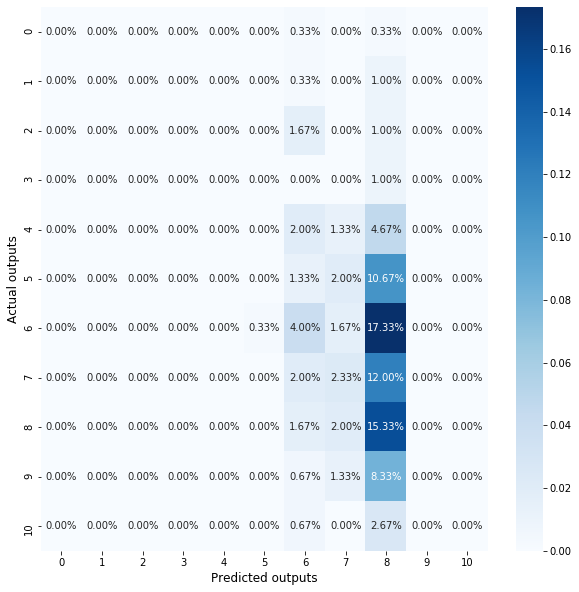

In [25]:
#Use K-Nearest Neighbours model with 310 nearest neighbours to predict the y value based on the X_test data which is unseen
#Get the accuracy of the prediction and plot a confusion matrix as well as combine the y_pred to the X_test data 
selectedModel = KNeighborsClassifier(n_neighbors = k_best)
selectedModel_trained = selectedModel.fit(X_train, y_train) #training
y_pred = selectedModel_trained.predict(X_test)

performanceAssessmentAccuracyScore = accuracy_score(y_test, y_pred)
print("*"*100)
print("Accuracy for testing set is:",performanceAssessmentAccuracyScore)
print("*"*100)
print("Confusion matrix for K-Nearest Neighbours model on Test set is:")
selectedModelConfusionMatrix = confusion_matrix(y_test, y_pred)
print(selectedModelConfusionMatrix)
print("*"*100)

#targetNames = ['1.0','1.5','1.75', '2.0','2.25','2.5','2.75', '3.0', '3.25', '3.5', '3.75','4.0','5.0']
targetNames = ['1.0','1.5','2.0','2.25','2.5','2.75', '3.0', '3.25', '3.5', '3.75','4.0']
#print(classification_report(y_test, y_pred))#, target_names = targetNames))
print("Classification report for K-Nearest Neighbours model on Test set is:")
print(classification_report(y_test, y_pred, target_names = targetNames))


#Ref  https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# This code is essentially from the above site with little modification

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selectedModelConfusionMatrix/np.sum(selectedModelConfusionMatrix), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted outputs', fontsize='large', color='black')
ax.set_ylabel('Actual outputs', fontsize='large', color='black')

#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
#Resize heatmap


# #sns.heatmap(cm, annot=True)
# #sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 cm.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      cm.flatten()/np.sum(cm)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# ax = plt.axes()
# ax.set_xlabel('Predicted outputs', fontsize='large', color='black')
# ax.set_ylabel('Actual outputs', fontsize='large', color='black')

# print('Confusion Matrix for Logistic Regression - Test (Suite 3)')
# sns.heatmap(cm, annot=labels, fmt='', cmap='Reds', ax = ax)


In [26]:
# Add the predictions back to X_Test
print(X_test.shape)
print(y_pred.shape)
dfXTest = pd.DataFrame(X_test)
dfyPred = pd.DataFrame(y_pred, columns = ['y_Predicted'])
dfyActual = pd.DataFrame(y_test, columns = ['y_Actual'])

#Merge on index
#REF https://thispointer.com/pandas-how-to-merge-dataframes-by-index-using-dataframe-merge-part-3/
testDataset = pd.merge(dfXTest,dfyPred, left_index=True, right_index=True)
print(str(testDataset.shape))
testDataset = pd.merge(testDataset,dfyActual,left_index=True, right_index=True) 
print(str(testDataset.shape))
print('Test data showing the encoded predicted Y and the encoded actual Y')

display(testDataset)

(300, 7)
(300,)
(300, 8)
(300, 9)
Test data showing the encoded predicted Y and the encoded actual Y


0         1         2         3         4         5         6  \
0    0.507692  0.975309  0.363636  0.310345  0.245283  1.000000  0.220930   
1    0.610256  0.026936  0.453005  0.568966  0.962264  0.171429  0.034884   
2    0.935897  0.747475  0.080637  0.379310  0.283019  0.314286  0.930233   
3    0.215385  0.901235  0.222907  0.568966  0.867925  1.000000  0.930233   
4    0.802564  0.233446  0.013867  0.189655  0.150943  0.600000  0.104651   
5    0.202564  0.637486  0.905496  0.655172  0.962264  1.000000  0.534884   
6    0.589744  0.594837  0.699538  0.482759  0.962264  0.771429  0.023256   
7    0.248718  0.375982  0.238829  0.517241  0.301887  0.771429  0.337209   
8    0.589744  0.331089  0.699538  0.482759  0.962264  1.000000  0.209302   
9    0.846154  0.661055  0.196199  0.482759  0.113208  0.171429  0.930233   
10   0.510256  0.848485  0.838726  0.568966  0.283019  0.457143  0.709302   
11   0.469231  0.535354  0.703647  0.482759  0.962264  0.771429  0.476744   
12   0.020513  0.986532  0.995891  0.482759  0.622642  0.600000  0.220930   
13   0.046154  0.255892  0.305598  0.517241  0.943396  1.000000  0.151163   
14   0.430769  0.237935  0.876733  0.568966  0.641509  0.771429  0.209302   
15   0.584615  0.133558  0.342578  0.517241  0.962264  1.000000  0.930233   
16   0.433333  0.060606  0.210067  0.655172  0.245283  0.514286  0.220930   
17   0.689744  0.835017  0.816127  0.482759  0.962264  0.771429  0.837209   
18   0.051282  0.253648  0.336929  0.482759  0.962264  0.771429  0.383721   
19   0.120513  0.268238  0.738059  0.568966  0.490566  1.000000  0.162791   
20   0.241026  0.884400  0.294813  0.482759  0.000000  1.000000  0.930233   
21   0.017949  0.535354  0.621469  0.568966  0.283019  0.771429  0.476744   
22   0.379487  0.255892  0.398562  0.482759  0.962264  1.000000  0.151163   
23   0.269231  0.955107  0.410889  0.482759  0.962264  1.000000  0.151163   
24   0.802564  0.234568  0.210067  0.482759  0.150943  0.600000  0.104651   
25   0.751282  0.384961  0.625578  0.568966  0.943396  0.600000  0.220930   
26   0.776923  0.149270  0.494093  0.568966  0.962264  0.742857  0.220930   
27   0.192308  0.709315  0.744222  0.603448  0.509434  0.171429  0.930233   
28   0.494872  0.799102  0.913713  0.655172  0.962264  0.771429  0.534884   
29   0.369231  0.648709  0.993837  0.482759  0.962264  1.000000  0.593023   
30   0.069231  0.298541  0.913713  0.482759  0.962264  1.000000  0.209302   
31   0.379487  0.861953  0.384181  0.413793  0.962264  0.771429  0.151163   
32   0.987179  0.849607  0.446841  0.482759  0.037736  0.200000  0.593023   
33   0.379487  0.148148  0.606061  0.568966  0.962264  1.000000  0.220930   
34   0.748718  0.618406  0.051361  0.568966  0.283019  0.457143  0.046512   
35   0.715385  0.151515  0.666667  0.568966  0.113208  1.000000  0.220930   
36   0.969231  0.361392  0.981510  0.568966  0.962264  1.000000  0.279070   
37   0.564103  0.716049  0.946584  0.482759  0.716981  1.000000  0.593023   
38   0.082051  0.423120  0.324088  0.517241  0.924528  1.000000  0.930233   
39   0.902564  0.716049  0.826400  0.482759  0.905660  1.000000  0.593023   
40   0.446154  0.038159  0.560863  0.482759  0.113208  0.457143  0.930233   
41   0.097436  0.272727  0.320493  0.568966  0.283019  1.000000  0.593023   
42   0.248718  0.744108  0.172573  0.517241  0.301887  0.171429  0.593023   
43   0.300000  0.645342  0.029789  0.482759  0.056604  1.000000  0.930233   
44   0.697436  0.180696  0.350796  0.586207  0.113208  1.000000  0.069767   
45   0.151282  0.126824  0.926040  0.482759  0.962264  0.771429  0.046512   
46   0.715385  0.835017  0.803801  0.482759  0.113208  0.771429  0.837209   
47   0.987179  0.039282  0.408834  0.396552  0.037736  1.000000  0.930233   
48   0.525641  0.679012  0.558808  0.500000  0.962264  1.000000  0.372093   
49   0.443590  0.870932  0.544427  0.517241  0.943396  0.771429  0.476744   
50   0.846154  0.406285  0.191063  0.482759  0.113208  0.457143  0.209302   
51   0.6

In [27]:
# Save model using Pickle
#REF https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

# save the model to disk
filename = 'model.pickle'
pickle.dump(selectedModel_trained, open(filename, 'wb'))


## <font color=blue>Task 7 - Conduct Other Analysis</font>


### 7a - Exploration of the dataset to find answers to some meaningful questions

#### 7a (i) - Percent of cocoa in chocolates and the consumer ratings

Fig 1 : Count of Chocolate Bar Ratings


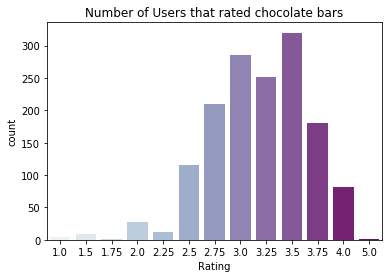

In [28]:
#to plot the ratings for chocolates
print("Fig 1 : Count of Chocolate Bar Ratings")
c= sns.countplot(x='Rating', data=dataset, palette='BuPu')
plt.title("Number of Users that rated chocolate bars")
plt.show(c)

First and foremost, it is important to know just how many chocolate bars were rated. In total, around 1500 chocolate bars were rated from 57 countries. The most number of ratings that were given was between 3.0 to 3.5, with the mode being 3.5 with a number of around 320 ratings. This shows us that most individuals are giving chocolate bars a rating of a little bit more than satisfactory. Moving on, we observe the patterns in the percent of cocoa that is in each chocolate bar.

Fig 2 : Count of cocoa percentage


Text(0.5, 1.0, 'Count of percentage of cocoa in chocolate bars')

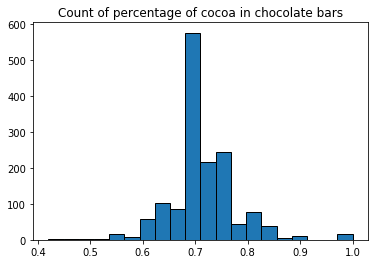

In [29]:
#to know the cocoa percentage
print("Fig 2 : Count of cocoa percentage")
#d= sns.histplot(x='Cocoa_Percentage', data=dataset,bins='auto',stat='count', palette='BuPu')
plt.hist(dataset["Cocoa_Percentage"], bins=20, edgecolor='black', linewidth=1)  #Look at distribution of values for price
plt.title("Count of percentage of cocoa in chocolate bars")
#plt.show(d)

As figure 2 shows us, most chocolate bars are made with around 70 to 75% cocoa in the bar. With close to 650 chocolate bars being made with 70% cocoa. Less than one hundred bars are made with 60% or less cocoa, and the number is even smaller for chocolate bars with 80% or higher cocoa in them.

##### Analyse chocolates with different cocoa percentages against consumer ratings

In [30]:
#to fetch the chocolates with 100% cocoa in them
cocoa_one_hundred =dataset[dataset['Cocoa_Percentage'] == 1.00]
cocoa_one_hundred.head()


Company_Maker      Specific_Bean_Origin_or_Bar_Name   REF  \
140                S.A.I.D.                           100 percent   615   
427                  Sirene  Camino Verde P., Balao, Guayas, 2012  1506   
446                  Pacari                                   Raw   266   
550  Bouga Cacao (Tulicorp)               El Oro, Hacienda de Oro   341   
704                  Sirene                Somia Plantation, 2012  1502   

     Review_Year  Cocoa_Percentage Company_Location  Rating  \
140         2010               1.0            Italy     1.5   
427         2015               1.0           Canada     3.0   
446         2008               1.0          Ecuador     2.0   
550         2009               1.0          Ecuador     1.5   
704         2015               1.0           Canada     3.0   

              Bean_Type Broad_Bean_Origin  
140             Unknown         Venezuela  
427             Unknown           Ecuador  
446  Forastero (Arriba)           Ecuador  
550  Forastero (Arriba)           Ecuador  
704          Trinitario        Madagascar

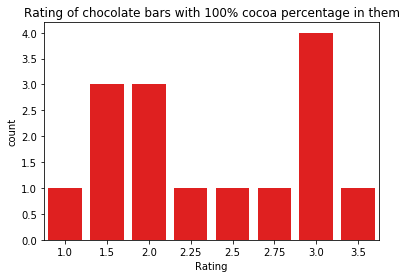

In [31]:
#ploting graph for 100% cocoa percent and the respective rating
s= sns.countplot(x='Rating', data= cocoa_one_hundred, color='Red' )
plt.title('Rating of chocolate bars with 100% cocoa percentage in them')
plt.show(s)


In [32]:
#to fetch the chocolates with 70% cocoa in them
cocoa_seventy = dataset[dataset['Cocoa_Percentage'] == 0.7]
cocoa_seventy.head()

Company_Maker Specific_Bean_Origin_or_Bar_Name   REF  Review_Year  \
2        Potomac                    Upala w/ nibs   647         2011   
3     Middlebury        Matagalpa, Cacao Bisiesto  1538         2015   
5        Salgado                       Rio Arriba   292         2008   
6    Cacao Store                       Madagascar  1684         2015   
7  Kaoka (Cemoi)                             Noir   404         2009   

   Cocoa_Percentage Company_Location  Rating                Bean_Type  \
2               0.7    United States    3.50                   Matina   
3               0.7    United States    3.50                  Unknown   
5               0.7        Argentina    3.50  Forastero (Arriba) ASSS   
6               0.7            Japan    3.00               Trinitario   
7               0.7           France    2.75                  Unknown   

  Broad_Bean_Origin  
2        Costa Rica  
3         Nicaragua  
5           Ecuador  
6        Madagascar  
7         Venezuela

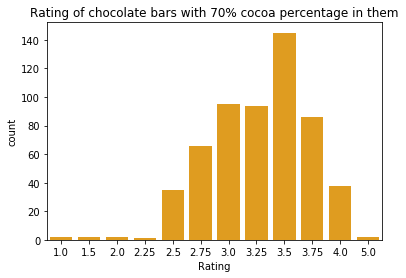

In [33]:
#ploting graph for 70% cocoa percent and the respective rating
w= sns.countplot(x='Rating', data= cocoa_seventy, color='orange' )
plt.title('Rating of chocolate bars with 70% cocoa percentage in them')
plt.show(w)

First, using the data, we found out how many chocolate bars had 100% cocoa. There were 15 chocolate bars with 100% cocoa, all originating from different parts of the world, and sold around the world in different companies. The reason for this analysis was to find out how the experts rated chocolate bars that had 100% cocoa.  As the figure shows, most consumers do not prefer chocolate bars with such a high cocoa percentage. The highest rating is 3.5, with four ratings at 3.0 (satisfactory), with the remainder below satisfactory (around 1.5 to 2).

Moving forward, we then observed that the mean amount of cocoa percent that was used is 70%. We saw that around 568 chocolate bars are made with 70% cocoa in them. We already observed that most individuals rate chocolate bars with 70% cocoa with a rating of 3.5 . Moreover, when we isolated the two chocolate bars that had the highest possible rating of 5.0, the data shows both of these chocolate bars had a cocoa percentage of 70%. Most of these experts seemed to prefer chocolate bars that had just enough cocoa to taste it in their desserts, but not enough to be overbearing. This would be a result of having a good blend of different ingredients in their chocolate bars, and people enjoying a more diverse chocolatey taste, rather than just tasting pure cocoa bean.

**Conclusions for 7a (i) - Analysis of cocoa percentage in chocolates**<br>
In conclusion, this data can be very valuable to individuals in the chocolate industry. Consumer preference can be useful to determine how well a chocolate bar will sell. For instance, if it is not selling well, then the amount of cocoa may be a reason?  We can see that most dark chocolate bars that were rated had a cocoa percent of 70%. 

In [34]:
#### 7a (ii) - Analysis of Top 15 Company Locations for the Rated Chocolates

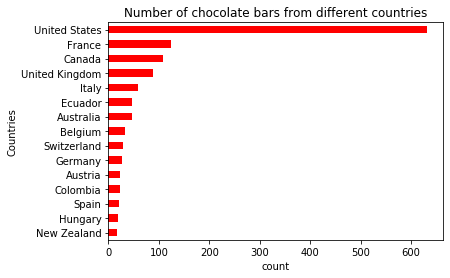

In [35]:
#unique value counts for each country
dataset['Company_Location'].value_counts().head(15).sort_values()

#to plot the graph for coutries where highest number of chocolates are produced
h= dataset['Company_Location'].value_counts().head(15).sort_values().plot(kind='barh' , color= 'red')
plt.title("Number of chocolate bars from different countries")
plt.ylabel("Countries")
plt.xlabel("count")
plt.show(h)

It is worthwhile to note where the chocolates being rated come from in terms of the country in which the company is located.  Based on the chart above of the top 15 countries, most companies were located in the United States and then France, Canada and the United Kingdom.  

In [36]:
#### 7a (iv) - Inspect Ratings Variable

In [37]:
#Describe method to look at rating variable
dataset["Rating"].describe()

count    1500.000000
mean        3.183167
std         0.484319
min         1.000000
25%         2.750000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [38]:
#dataset = originalCleanedDataset.copy()
#Look at the counts of unique values of ratings
dataset['Rating'].value_counts()

3.50    320
3.00    285
3.25    251
2.75    210
3.75    181
2.50    115
4.00     82
2.00     28
2.25     12
1.50      9
1.00      4
5.00      2
1.75      1
Name: Rating, dtype: int64

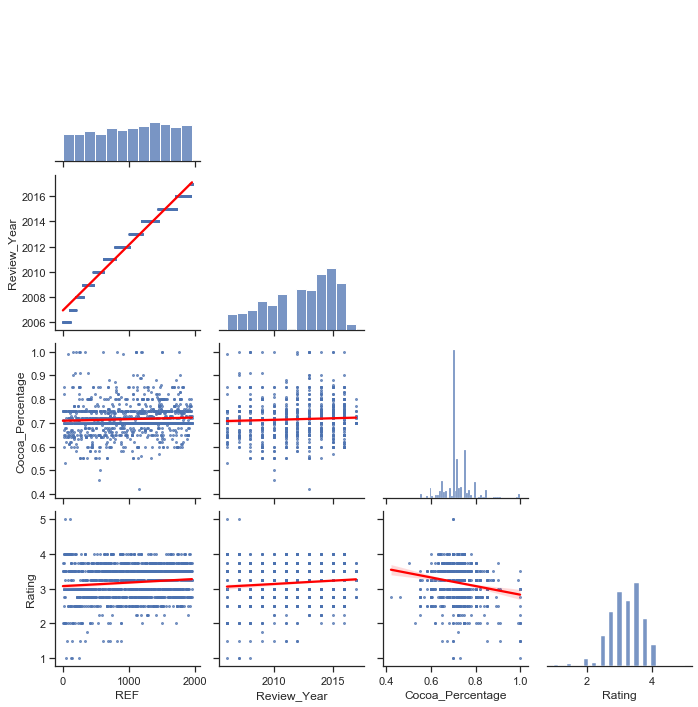

In [39]:
#correlation between numeric value
#NOTE
#Rating has positive corelations between REF,Review year. But It also have a significant negative with Cocoa_percentage
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset,kind='reg',corner=True, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7,'s': 4}})  

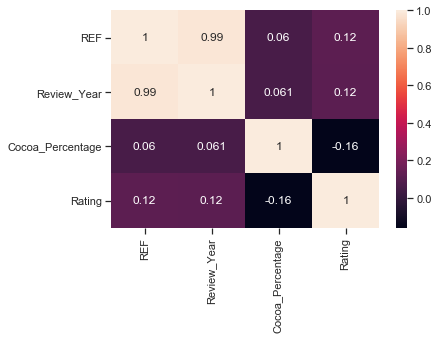

In [40]:
#REF https://datatofish.com/correlation-matrix-pandas/ 
#heatmat confirms the scatter matrix with very low correlation between the rating variable and either REF or Review Year
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

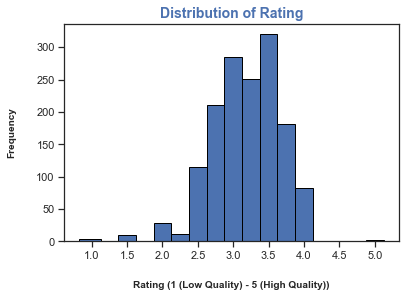

In [41]:
#2.1d - Histogram of Rating Variable
#Task 2.1 Chart 4
binEdges = [0.825,1.125, 1.375, 1.625, 1.875, 2.125, 2.375, 2.625, 2.875, 3.125, 3.375, 3.625, 3.875, 4.125, 4.375, 4.625, 4.875, 5.125]
binTicks = [1,1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.hist(dataset["Rating"], bins = binEdges, edgecolor='black', linewidth=1)  
plt.title("Distribution of Rating",weight='bold', size=14, color='b' )
plt.ylabel('Frequency', labelpad=20, weight='bold', size=10)
plt.xticks(binTicks)
plt.xlabel('Rating (1 (Low Quality) - 5 (High Quality))', labelpad=20, weight='bold', size=10)
plt.show()

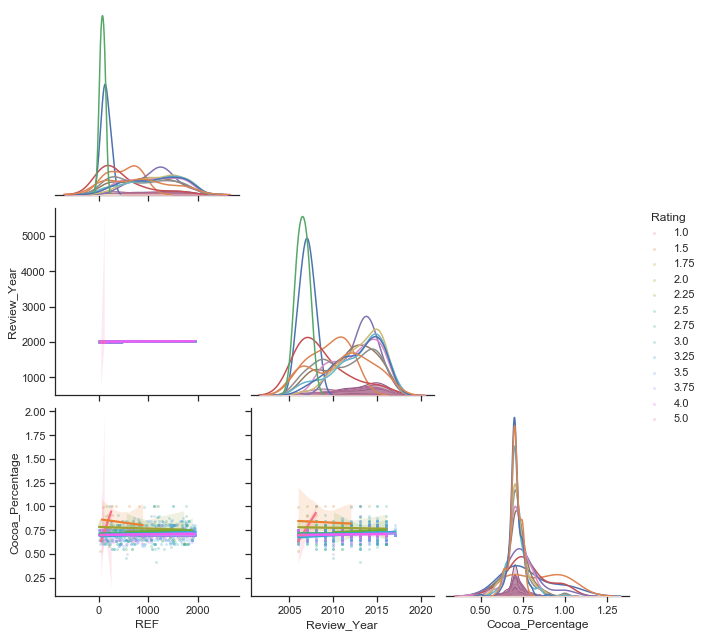

In [42]:
#The kernel density estimation (KDE) distributions of each Rating
# produces warning so delete

g = sns.pairplot(dataset,kind='reg',corner=True, diag_kind='auto', plot_kws={'scatter_kws': {'alpha': 0.2,'s': 4}} ,hue='Rating',height=3)  

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs)

g.map_diag(f)
plt.show()

In [43]:
### 7b - Feature Importance Using Decision Tree Classifier

Accuracy : 0.216
[[ 0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  3  0  0]
 [ 0  0  0  0  0  0  7  3  0  0  0]
 [ 0  0  0  0  0  0  0  2  1  0  0]
 [ 0  0  0  0  0  0  8  9 14  0  0]
 [ 0  0  0  0  0  0  3 26 24  0  0]
 [ 0  0  0  0  0  0 27 30 27  0  0]
 [ 0  0  0  0  0  0  4 19 33  0  0]
 [ 0  0  0  0  0  0  9 30 35  0  0]
 [ 0  0  0  0  0  0  5 18 22  0  0]
 [ 0  0  0  0  0  0  2  1  9  0  0]]
****************************************************************************************************
Feature Importance
Company_Maker 0.0
Specific_Bean_Origin_or_Bar_Name 0.0
REF 0.8078837232908634
Cocoa_Percentage 0.1921162767091365
Company_Location 0.0
Bean_Type 0.0
Broad_Bean_Origin 0.0


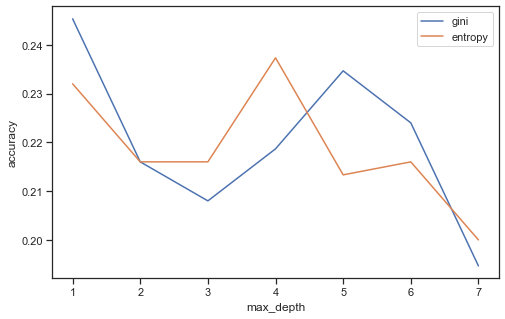

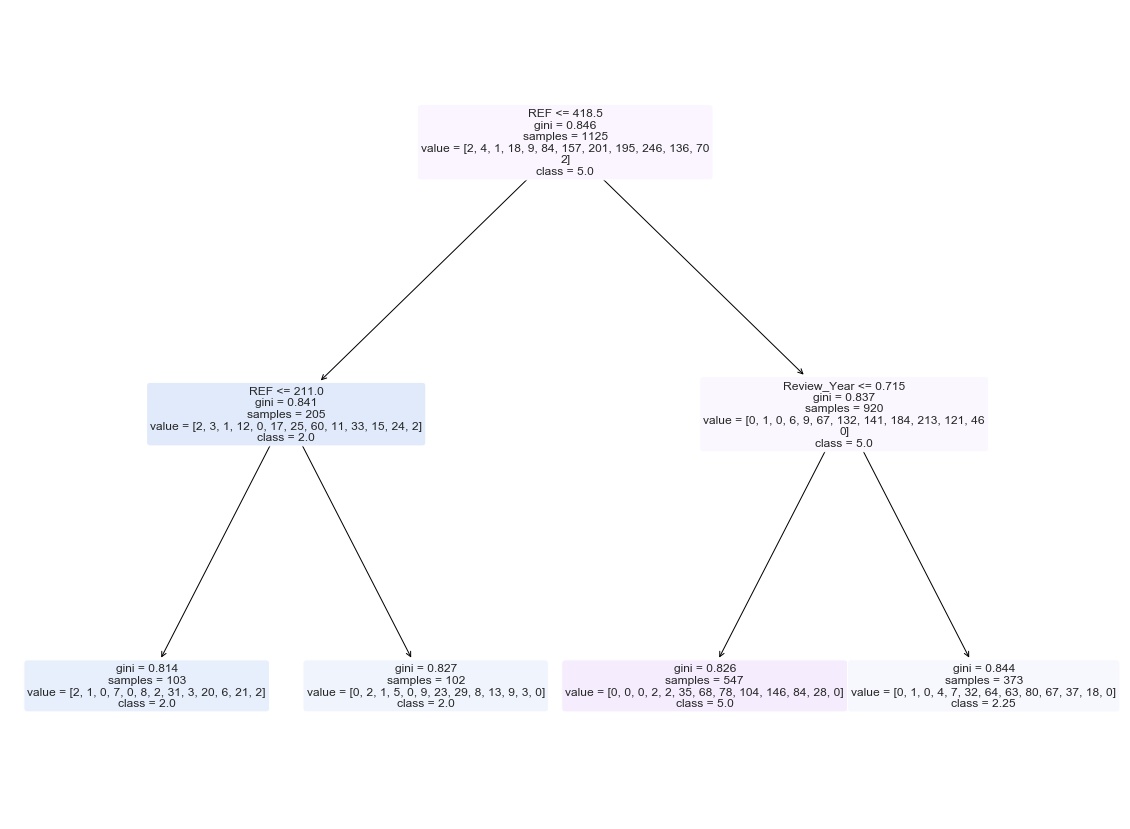

In [44]:
#due to all columns has been transfer in different method, so its hard to transfer it back onnce.
#get original Y
datasetOri = pd.read_csv('chocolate.csv', header = 0,  sep = ",",na_values =  [""," ","?", chr(160)],names=columnNames) #use just for key index
index_Rating = datasetOri.loc[:,'Rating']
index_Rating = index_Rating.astype(str)

#Needed to add this back without .values as the code belows needs a dataframe column
X2 = modelDataset.drop(['Rating'],axis=1)  #Needed to add this back without .values as the code belows needs a dataframe column

#decision tree to generate feature importance
#find the best hyperparameter
from sklearn.tree import DecisionTreeClassifier, plot_tree

max_depth = []
acc_gini = []
acc_entropy = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12) #default set
#hyper parameter tunning
for i in range(1,8):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dt_trained = dt.fit(X_train, y_train)
    y_pred = dt_trained.predict(X_test)
    acc_gini.append(accuracy_score(y_test, y_pred))
    
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dt_trained = dt.fit(X_train, y_train)
    y_pred = dt_trained.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, y_pred))
    max_depth.append(i)

    d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
    
#visualizing changes in parameters
#https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752
plt.figure(figsize=(8,5))
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
#get hightest accuracy when using entropy and max depth is 2

dt = DecisionTreeClassifier(random_state=1, max_depth=2, criterion='gini')
dt_trained = dt.fit(X_train, y_train)
y_predR = dt_trained.predict(X_test)
acc_3 = accuracy_score(y_test, y_predR)
print("Accuracy :",acc_3)
cf_m = confusion_matrix(y_test, y_predR)
print(cf_m)
print("*"*100)

plt.figure(figsize=(20,15))
T= plot_tree(dt_trained,
         filled=True,
         rounded=True,
         feature_names=datasetOri.columns,
         class_names=index_Rating.unique(),
         fontsize=12
         ,
         )
for o in T:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
        
print("Feature Importance")    
importance = dt_trained.feature_importances_
#feature importance by columns
featureCol = {}
for col,score in zip(X2.columns,importance):
    print(col,score)
    featureCol[col] = importance

### 7c - Mapping of Average Chocolate Rating by Country on a World Map

#### The Code is likely to create errors as it requires additional libraries to be installed for country mapping
* Includes pycountry which was used to convert company locations to valid ISO country codes
* Folium for mapping
* pycountry-convert 
* geopy to get latitude and longitude 

e.g. pip install pycountry  needs to be run

In [45]:
#Fetch required libraries
import pandas as pd
import pycountry as pc
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

In [46]:
#REFERENCE https://gist.github.com/JoeThunyathep/97e780195bef669e0e242e89c4931062
# This code was used to determine if the Company_Location "country" was a valid ISO country name
# Some countries were mispelled (e.g. Domincan Republic), others were abbreviated or were just not their exact ISO country name
# Iso country name required to map to latitude and longitude
# Dictionary created as each wrong occurrence was encountered to map to its real value, e.g. U.S.A. --> United States
# Note countries like Scotland and Wales do not have their own ISO code so these are converted to United Kingdom

#various functions to make this work
import pycountry as pc
          
def findCountry (country_name):
    countriesToCleanDictionary = {'U.S.A.': 'United States', 'U.K.' : 'United Kingdom', 'Scotland':'United Kingdom','Vietnam':'Viet Nam',
                                 'Amsterdam' : 'Netherlands', 'Venezuela': 'Venezuela, Bolivarian Republic of', 'Czech Republic' : 'Czechia',
                                 'Domincan Republic':'Dominican Republic', 'South Korea' : 'Korea, Republic of',
                                 'Bolivia':'Bolivia, Plurinational State of', 'Russia' : 'Russian Federation', 'St. Lucia' : 'Saint Lucia'
                                 ,'Wales': 'United Kingdom', 'Sao Tome' : 'Sao Tome and Principe'}
   
    try:
        if country_name in  countriesToCleanDictionary:
            country_name = countriesToCleanDictionary.get(country_name)
        return pc.countries.get(name=country_name).name
    except:
        return ("Unknown - No Match")

def findCountryAlpha2 (country_name):
    try:
        return pc.countries.get(name=country_name).alpha_2
    except:
        return ("Unknown - No Match")

#*****************************************************************************************
#********CONVERT COUNTRY NAMES TO LONGITUDE AND LATITUDE AND PLOT ON MAP******************
#*****************************************************************************************
#REFERENCE https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10
#REFERENCE https://gist.github.com/JoeThunyathep/97e780195bef669e0e242e89c4931062
#installation pip install pycountry-convert
#function to convert to alphA2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

#*****************************************************************************************
#**************GET LONGITUDE AND LATITUDE BASED ON ISO COUNTRY NAME***********************
#*****************************************************************************************
#installation pip install geopy
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="My-Application")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [47]:
#Reload original data set and Add Geolocation features by looking them up
columnNames = ['Company_Maker','Specific_Bean_Origin_or_Bar_Name','REF','Review_Year', 'Cocoa_Percentage','Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']
dataset2 = pd.read_csv('chocolate.csv', header = 0,  sep = ",",na_values =  [""," ","?", chr(160)],names=columnNames)  

###########################################################################################################################
#Add Geolocation Features
#Convert the Company_Location column into new columns that have ISO country names, alpha2 codes, and continent codes
dataset2['Company_Location_Country'] = dataset2.apply(lambda row: findCountry(row.Company_Location) , axis = 1)
dataset2['Company_Location_Country_Alpha2'] = dataset2.apply(lambda row: findCountryAlpha2(row.Company_Location_Country) , axis = 1)
dataset2['Company_Location_Continent'] = dataset2.apply(lambda row: get_continent(row.Company_Location_Country) , axis = 1)
print(dataset2['Company_Location_Country'].value_counts())

###########################################################################################################################
#REFERENCE https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
#REFERENCE https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
# create a new dataframe which includes summary details like the maximum rating, minimum, rating, and count of ratings for a country
# create a dataframe that calculates the mean Rating by country
# Merge to a new dataframe so there is only one line per country with all the stats
df1 = dataset2.groupby('Company_Location_Country', as_index=False).Rating.agg(['max', 'count','min']).reset_index()
df2 = dataset2.groupby('Company_Location_Country').Rating.mean().reset_index()
df = pd.merge(df1,df2,on='Company_Location_Country')
display(df.info())

United States                        632
France                               124
Canada                               108
United Kingdom                        88
Italy                                 59
Ecuador                               47
Australia                             46
Belgium                               33
Switzerland                           29
Germany                               27
Colombia                              22
Austria                               22
Spain                                 20
Hungary                               19
New Zealand                           17
Japan                                 17
Venezuela, Bolivarian Republic of     16
Peru                                  14
Denmark                               14
Brazil                                14
Madagascar                            13
Guatemala                              9
Israel                                 8
Costa Rica                             8
Argentina       

None

In [48]:
###########################################################################################################################
#Fetch the latitude and longitude of the countries using the geopy function above
#That function returns a tuple, so either you can retrieve each column in isolation meaning two passes against each row which 
#takes more time, or there is a method to get the tuple and return it to two separate columns using the zip(*map) method

#df['Latitude'] = df.apply(lambda row: geolocate(row.Company_Location_Country)[0] , axis = 1)
#df['Longitude'] = df.apply(lambda row: geolocate(row.Company_Location_Country)[1] , axis = 1)
#REFERENCE https://stackoverflow.com/questions/66822968/python-pandas-data-frame-assign-function-return-tuple-to-two-columns-of-a-data
df['Latitude'], df['Longitude'] = zip(*map(geolocate, df['Company_Location_Country']))

###########################################################################################################################
#Round the Rating column for plotting on map
#REF https://datatofish.com/round-values-pandas-dataframe/
#Convert the 'Rating' column to be 3 decimal places for display on the map
df['Rating'] = df['Rating'].round(decimals=3)

###########################################################################################################################
#installation  pip install folium
#REF https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10
# Create a world map and then plot the average chocolate rating by latitude and longitude
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=10
        popup_text = """Country : {}<br>
                    Average Rating : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Company_Location_Country'],
                                   df.iloc[i]['Rating']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

## <font color=blue>Appendix - Attempted but Unused Code</font>

### Appendix 1 - KNN-imputer attempts to fill missing values in Bean_Type and Broad_Bean_Origin

In [49]:
# #########################################################################################################################
# #####################################  ATTEMPT TO FILL MISSING VALUES USING KNN-IMPUTER #################################
# #########################################################################################################################
# #In order to predict the missing value, we will do feature imputation
# #It could get a better result but considered only a proxy for true value 
# #REF https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
# #REF https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
# #Dealing with the missing value is necessary in this dataset

# Some columns stores multiple

# # 4 columns contains multi values in one cell
# # Specific_Bean_Origin_or_Bar_Name has more than of 32% contains multiple value or 490 rows

# print("*"*100)

# #before feature scaling---------------------------------
# print('before scaling')
# print("*"*50)
# #display(dataset.head(5))
# #g = sns.pairplot(dataset,kind='reg',corner=True, diag_kind='auto', plot_kws={'scatter_kws': {'alpha': 0.2,'s': 4}} ,hue='Rating',height=3)  

# #def f(x, **kwargs):
# #    kwargs.pop("color")
# #    col = next(plt.gca()._get_lines.prop_cycler)['color']
# #    sns.kdeplot(x, color=col, **kwargs)
# #
# #g.map_diag(f)
# #plt.show()

# #In order to predict the missing value, we will do feature imputation
# #It could get a better result but considered only a proxy for ture value (https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

# #--------------------------------------------------------
# #FEATURE SCALING - NORMALIZATION
# #--------------------------------------------------------
# #NOTE-  that is scaling for filling NaN. We need to do its again for the real prediction.
# from sklearn.preprocessing import StandardScaler 
# data_norm1 = dataset.copy()
# scaler_z = StandardScaler()
# data_norm1_nm  = data_norm1 .select_dtypes(exclude=['object']) #only numerical-value columns
# print(data_norm1_nm.columns)
# dataset_norm1 = data_norm1[data_norm1_nm.columns] = scaler_z.fit(data_norm1_nm).transform(data_norm1_nm)
# print("Post-Feature Scaling ")
# print("*"*50)
# display(data_norm1.head(5))
# #according to visulaization, the column Review_Year can be more differentiated after normalization

# #after feature scaling---------------------------------
# #g = sns.pairplot(data_norm1,kind='reg',corner=True, diag_kind='auto', plot_kws={'scatter_kws': {'alpha': 0.2,'s': 4}} ,hue='Rating',size=3)  
# #def f(x, **kwargs):
# #    kwargs.pop("color")
# #    col = next(plt.gca()._get_lines.prop_cycler)['color']
# #    sns.kdeplot(x, color=col, **kwargs)
# #g.map_diag(f)
# #plt.show()

# #--------------------------------------------------------
# #Feature Transforming ----LabelEncoding to convert into numeric before predict the missing value
# from sklearn import preprocessing
# print("transfer to numeric labels")
# labelencoder=preprocessing.LabelEncoder()
# dataset_encode = data_norm1.copy()
# dataset_encode['Company_Maker'] = labelencoder.fit_transform(dataset_encode['Company_Maker'])
# dataset_encode['Company_Location'] = labelencoder.fit_transform(dataset_encode['Company_Location'])
# dataset_encode['Specific_Bean_Origin_or_Bar_Name'] = labelencoder.fit_transform(dataset_encode['Specific_Bean_Origin_or_Bar_Name'])
# print("*"*50)
# display(dataset_encode.head(3))

# #--------------------------------------------------------
# #FEATURE IMPUTATION----------------------------------------- 
# #predict missing value in dataset with machine learning

# # predict Broad_Bean_Origin using values of others columns-----------------------------
# print("Drop unneccesary column for Broad_Bean_Origin")
# print("*"*50)
# data_B1 = dataset_encode.copy()
# data_BB  = data_B1.drop(['Bean_Type','REF','Review_Year','Company_Maker'], 1)
# #by dropping Specific_Bean_Origin_or_Bar_Name/Company_Location/Cocoa_Percentage/Cocoa_Percentage result less predictive performance
# data_BB.shape[1]
# #split dataset fot testing and training 
# test_data_BB = data_BB[data_BB['Broad_Bean_Origin'].isnull()] #test set is the rows where Broad_Bean_Origin is Null
# train_data_BB = data_BB[data_BB['Broad_Bean_Origin'].notnull()] #train set is the rows where Broad_Bean_Origin is not Null

# print('Testing data for predicting Broad_Bean_Origin')
# display(test_data_BB.head(3))
# print('Training data for predicting Broad_Bean_Origin')
# display(train_data_BB.head(3))

# #define X,Y
# X = train_data_BB.drop('Broad_Bean_Origin', axis=1).values
# Y = train_data_BB['Broad_Bean_Origin'].values
# print (test_data_BB.shape, train_data_BB.shape)
# #split train, test

# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
# #Import Random Forest Model
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# #n_estimators represents the number of trees in the forest
# #higher number result to the better performance but high computing
# n_estimators = range(1, 500, 100)
# cv_scores =[]

# for n in n_estimators:
#     RFcl=RandomForestClassifier(n_estimators=n, random_state=1)
#     RFcl.fit(X_train,y_train)
#     y_pred=RFcl.predict(X_test) #Train the model 
#     scores = metrics.accuracy_score(y_test, y_pred)
#     cv_scores.append(scores.mean()) 
#     n_best = n_estimators[np.argmax(cv_scores)]    
# print ('cv_scores:', cv_scores)
# print ('n_best:',n_best)
# print("*"*100)


# #visulize best n
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(n_estimators, cv_scores)
# plt.xlabel('Value of n_estimators for Broad_Bean_Origin')
# plt.ylabel('Testing Accuracy')
# #the best value for n_estimators is 
# #https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

# # use the best-n
# RFcl=RandomForestClassifier(n_estimators=301, random_state=1)
# RFcl.fit(X_train,y_train)
# y_pred_BB = RFcl.predict(X_test) #Train the model 
# print('number of prediction training set')
# print (y_pred_BB.size)
# #accuray
# acc_BB = accuracy_score(y_test, y_pred_BB)
# print("Accuracy for replacing missing value in Broad_Bean_Origin:",acc_BB)
# print("*"*100)
# #fill missing value in Broad_Bean_Origin
# RFcl=RandomForestClassifier(n_estimators=301, random_state=1)
# RFcl.fit(X_train,y_train)
# X_predict_BB = test_data_BB.drop('Broad_Bean_Origin', axis=1).values # X for predict Y Bean_Type in real dataset

# y_pre_BB = RFcl.predict(X_predict_BB)
# print('number of prediction testing set')
# print(y_pre_BB.shape[0])
# acc_BB = accuracy_score(y_test, y_pred_BB)
# print("Accuracy for replacing missing value in Broad_Bean_Origin:",acc_BB)
# print("*"*100)

# #seperate dataset before filling
# data_clean = data_B1.copy()
# data_clean.loc[data_clean.Broad_Bean_Origin.isnull(),'Broad_Bean_Origin'] =  y_pre_BB
# print("After filling")
# display(data_clean.head())
# display(data_clean.shape[0])
# print("number of missing value in Broad_Bean_Origin:")
# print(data_clean['Broad_Bean_Origin'].isnull().values.any())
# #converse Broad_Bean_Origin to numberic to predict Bean_Type
# print('Encoding to predict another column')
# data_clean2 = data_clean.copy()
# data_clean2
# data_clean2['Broad_Bean_Origin'] = labelencoder.fit_transform(data_clean2['Broad_Bean_Origin'])
# #display(data_clean) fill Bean_Type before encoding
# display(data_clean2) #after encoding

# #FEATURE IMPUTATION----------------------------------------- 
# #predict missing value in dataset with machine learning
# # predict Bean_Type using values of others columns----------------------
# print("Predict missing value in column Bean_Type")
# print("*"*50)
# data_B2 = data_clean2.copy()
# data_BT  = data_B2.drop(['REF','Review_Year'], 1)
# #NOTE: factor of which column is be dropped out is from predicting testing by drop each column to gain the best performance
# #NOTE: by dropping Rating/Specific_Bean_Origin_or_Bar_Name/Company_Location affect to the worse result
# #strongly related to Broad_Bean_Origin
# #related to Company_Maker/Company_Maker

# data_BT.shape[1]
# #split dataset fot testing and training 
# test_data_BT = data_BT[data_BT['Bean_Type'].isnull()] #test set is the rows where Bean_Type is Null
# train_data_BT = data_BT[data_BT['Bean_Type'].notnull()] #train set is the rows where Bean_Type is not Null

# print('Testing data for predicting Bean_Type')
# display(test_data_BT.head(3))
# print('Training data for predicting Bean_Type')
# display(train_data_BT.head(3))

# #define X,Y
# X = train_data_BT.drop('Bean_Type', axis=1).values
# Y = train_data_BT['Bean_Type'].values
# print (test_data_BT.shape, train_data_BT.shape)
# #split train, test
# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1) 

# #train and find the best n_estimator
# n_estimators = range(1, 500, 100)
# cv_scores =[]
# for n in n_estimators:
#     RFcl=RandomForestClassifier(n_estimators=n,random_state=1)
#     RFcl.fit(X_train,y_train)
#     y_pred=RFcl.predict(X_test) #Train the model 
#     scores = metrics.accuracy_score(y_test, y_pred)
#     cv_scores.append(scores.mean()) 
#     n_best = n_estimators[np.argmax(cv_scores)]    
# print ('cv_scores:', cv_scores)
# print ('n_best:',n_best)
# print("*"*100)
# #visulize best n
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(n_estimators, cv_scores)
# plt.xlabel('Value of n_estimators for RFcf_Bean_Type')
# plt.ylabel('Testing Accuracy')

# # use the best-n for predict test set(Real missing)
# RFcl=RandomForestClassifier(n_estimators=101, random_state=1)
# RFcl.fit(X_train,y_train)
# y_pred_B = RFcl.predict(X_test) #Train the model 
# print (y_pred_B.size)
# #accuray
# acc_B = accuracy_score(y_test, y_pred_B)
# print("Accuracy for replacing missing value in Bean_Type:",acc_B)
# print("*"*100)
# #https://towardsdatascience.com/missing-value-imputation-with-python-and-k-nearest-neighbors-308e7abd273d
# #ref:https://www.kaggle.com/asifranaar/predict-chocolate-rating-using-ml#
# #ref:https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637

# #fill missing value in Bean_Type
# RFcl=RandomForestClassifier(n_estimators=101, random_state=1)
# RFcl.fit(X_train,y_train)
# X_predict_BT = test_data_BT.drop('Bean_Type', axis=1).values # X for predict Y Bean_Type in real dataset
# y_pre_BT = RFcl.predict(X_predict_BT)
# print('number of prediction')
# print(y_pre_BT.shape[0])

# #seperate dataset before filling
# data_clean2.loc[data_clean2.Bean_Type.isnull(),'Bean_Type'] =  y_pre_BT
# print('After filling')
# display(data_clean2.head(5))
# data_clean2.shape[0]
# print("number of missing value in Bean_Type:")
# data_clean2['Bean_Type'].isnull().values.any()
# #no missing in Bean_Type

# #Reference dataset
# #from predicting missing value, reverse it back as a original value
# data_post = dataset.drop(['Bean_Type','Broad_Bean_Origin'],1)
# data_post['Bean_Type'] = data_clean2['Bean_Type']
# data_post['Broad_Bean_Origin'] = data_clean['Broad_Bean_Origin']

### Appendix 2 - Conversion of data from pycountry to add additional country information to dataframe

In [50]:

# Create a new dataframe based off code to fetch latitude and longitude for an ISO country code and then plot it against a map
# In order to avoid the API fetching the latitude and longitude each time, and to enable sharing with group members who did 
# not have necessary libraries installed, the resulting dataframe was converted to a dictionary so that it could be easily
# created as a dataframe without having to supply an additional CSV file
# This has 

# dictionaryToConvertToDf = {'Company_Location': ['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador', 'Fiji', 'France', 'Germany', 'Ghana', 'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname', 'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales'], 'Max_Country_Rating': [3.75, 3.75, 4.0, 3.75, 4.0, 3.75, 4.0, 4.0, 3.75, 4.0, 3.5, 2.75, 3.75, 3.5, 4.0, 3.5, 4.0, 4.0, 2.75, 3.25, 4.0, 3.5, 3.75, 3.5, 2.5, 3.25, 3.75, 5.0, 3.5, 3.75, 4.0, 2.75, 3.0, 3.5, 3.75, 3.25, 3.5, 3.5, 3.75, 3.0, 2.75, 3.25, 1.0, 4.0, 3.5, 3.0, 3.5, 4.0, 3.25, 3.25, 3.5, 4.0, 4.0, 4.0, 3.75, 3.75, 2.75], 'Count_Country_Rating': [3, 7, 46, 22, 33, 2, 14, 108, 2, 22, 8, 1, 14, 5, 47, 3, 124, 27, 1, 3, 9, 6, 19, 2, 1, 2, 8, 59, 17, 5, 13, 1, 3, 4, 17, 5, 14, 1, 6, 2, 3, 1, 1, 8, 1, 3, 5, 20, 2, 1, 5, 29, 79, 632, 16, 7, 1], 'Min_Country_Rating': [3.25, 3.25, 2.5, 2.75, 1.0, 2.75, 2.75, 2.0, 3.75, 2.0, 2.5, 2.75, 2.5, 3.0, 1.5, 2.75, 1.5, 1.5, 2.75, 2.5, 2.75, 2.75, 2.5, 3.0, 2.5, 2.75, 2.5, 1.5, 2.25, 2.5, 2.5, 2.75, 2.75, 3.5, 2.5, 2.75, 1.5, 3.5, 2.5, 2.75, 2.5, 3.25, 1.0, 2.75, 3.5, 2.5, 2.75, 2.5, 2.75, 3.25, 2.75, 2.0, 1.75, 1.5, 2.5, 3.25, 2.75], 'Average_Country_Rating': [3.5, 3.464, 3.348, 3.227, 3.091, 3.25, 3.375, 3.329, 3.75, 3.159, 3.125, 2.75, 3.304, 3.2, 2.984, 3.25, 3.252, 3.213, 2.75, 2.833, 3.361, 3.208, 3.224, 3.25, 2.5, 3.0, 3.219, 3.314, 3.088, 3.15, 3.231, 2.75, 2.917, 3.5, 3.191, 3.0, 2.893, 3.5, 3.292, 2.875, 2.583, 3.25, 1.0, 3.375, 3.5, 2.667, 3.2, 3.25, 3.0, 3.25, 3.05, 3.284, 3.111, 3.141, 3.156, 3.5, 2.75], 'Company_Location_Country': ['Netherlands', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia, Plurinational State of', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Fiji', 'France', 'Germany', 'Ghana', 'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Russian Federation', 'Sao Tome and Principe', 'United Kingdom', 'Singapore', 'South Africa', 'Korea, Republic of', 'Spain', 'Saint Lucia', 'Suriname', 'Sweden', 'Switzerland', 'United Kingdom', 'United States', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'United Kingdom'], 'Company_Location_Country_Alpha2': ['NL', 'AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'CA', 'CL', 'CO', 'CR', 'CZ', 'DK', 'DO', 'EC', 'FJ', 'FR', 'DE', 'GH', 'GD', 'GT', 'HN', 'HU', 'IS', 'IN', 'IE', 'IL', 'IT', 'JP', 'LT', 'MG', 'MQ', 'MX', 'NL', 'NZ', 'NI', 'PE', 'PH', 'PL', 'PT', 'PR', 'RU', 'ST', 'GB', 'SG', 'ZA', 'KR', 'ES', 'LC', 'SR', 'SE', 'CH', 'GB', 'US', 'VE', 'VN', 'GB'], 'Company_Location_Continent': ['EU', 'SA', 'OC', 'EU', 'EU', 'SA', 'SA', 'NA', 'SA', 'SA', 'NA', 'EU', 'EU', 'NA', 'SA', 'OC', 'EU', 'EU', 'AF', 'NA', 'NA', 'NA', 'EU', 'EU', 'AS', 'EU', 'AS', 'EU', 'AS', 'EU', 'AF', 'NA', 'NA', 'EU', 'OC', 'NA', 'SA', 'AS', 'EU', 'EU', 'NA', 'EU', 'AF', 'EU', 'AS', 'AF', 'AS', 'EU', 'NA', 'SA', 'EU', 'EU', 'EU', 'NA', 'SA', 'AS', 'EU'], 'Latitude': [52.5001698, -34.9964963, -24.7761086, 47.2, 50.6402809, -17.0568696, -10.3333333, 61.0666922, -31.7613365, 2.8894434, 10.2735633, 49.8167003, 55.670249, 19.0974031, -1.3397668, -18.1239696, 46.603354, 51.0834196, 8.0300284, 12.1360374, 15.6356088, 15.2572432, 47.1817585, 64.9841821, 22.3511148, 52.865196, 31.5313113, 42.6384261, 36.5748441, 55.3500003, -18.9249604, 14.6367927, 22.5000485, 52.5001698, -41.5000831, 12.6090157, -6.8699697, 12.7503486, 52.215933, 40.0332629, 18.2214149, 64.6863136, 0.8875498, 54.7023545, 1.357107, -28.8166236, 36.638392, 39.3260685, 13.8250489, 4.1413025, 59.6749712, 46.7985624, 54.7023545, 39.7837304, 8.0018709, 13.2904027, 54.7023545], 'Longitude': [5.7480821, -64.9672817, 134.755, 13.2, 4.6667145, -64.9912286, -53.2, -107.991707, -71.3187697, -73.783892, -84.0739102, 15.4749544, 10.3333283, -70.3028026, -79.3666965, 179.0122737, 1.8883335, 10.4234469, -1.0800271, -61.6904045, -89.8988087, -86.0755145, 19.5060937, -18.1059013, 78.6677428, -7.9794599, 34.8667654, 12.674297, 139.2394179, 23.7499997, 46.4416422, -61.01582685063731, -100.0000375, 5.7480821, 172.8344077, -85.2936911, -75.0458515, 122.7312101, 19.134422, -7.8896263, -66.41328179513847, 97.7453061, 6.9648718, -3.2765753, 103.8194992, 24.991639, 127.6961188, -4.8379791, -60.975036, -56.0771187, 14.5208584, 8.2319736, -3.2765753, -100.4458825, -66.1109318, 108.4265113, -3.2765753]}
# companyLocationSummary = pd.DataFrame(dictionaryToConvertToDf)

# # Add additional country details to dataset
# originalCleanedDataset = dataset.copy()
# dataset = pd.merge(dataset,companyLocationSummary, how="inner", on = 'Company_Location')

# originalCleanedDataset['Company_Location'] = originalCleanedDataset.apply(lambda row: convertToISOCountry(row.Company_Location) , axis = 1)
# print('Updated dataset with country information for mapping shape is: '+ str(dataset.shape))
# print('Renamed original dataset shape is: ' + str(originalCleanedDataset.shape))


### Appendix 3 - Model Imputing catagorical value used RandomForest

In [51]:
# #Missing Data Heatmap
# print("Missing Value Heatmap")
# import seaborn as sns
# cols = dataset.columns
# colours = ['#000099', '#ffff00'] 
# #sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))
# #ref - https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
# #Dealing with the missing value is necessary in this dataset,

# #explore catagorical value by frequencies of the unique values (percentage)
# print("frequencies of the unique values_percentage")
# print("*"*100)

# column_cata = ['Company_Maker','Specific_Bean_Origin_or_Bar_Name','Company_Location','Bean_Type','Broad_Bean_Origin']
# for c in dataset[column_cata]:
#     print(c)
#     print("*"*50)
#     print(dataset[c].value_counts(normalize=True).head(10))#get index value
#     print("*"*100)

# #some columns stores multiple
# #We should to do fature engineer to maintain these meaningful values.

# column_cata = ['Company_Maker','Specific_Bean_Origin_or_Bar_Name','Company_Location','Bean_Type','Broad_Bean_Origin']
# for c in dataset[column_cata]:
#     print('numbers of row which',c, 'contains multiple value is')
#     a = dataset[dataset[c].str.contains(',', na=False)].shape[0]
#     print(dataset[dataset[c].str.contains(',', na=False)].shape[0])
#     print(str(a/len(dataset)),'% of the dataset')
#     print("*"*50)

# # 4 columns contains multi values in one cell
# # Specific_Bean_Origin_or_Bar_Name has more than of 32% contains multiple value or 490 rows

# print("*"*100)

# #before feature scaling---------------------------------
# print('before scaling')
# print("*"*50)
# #display(dataset.head(5))
# #g = sns.pairplot(dataset,kind='reg',corner=True, diag_kind='auto', plot_kws={'scatter_kws': {'alpha': 0.2,'s': 4}} ,hue='Rating',height=3)  

# #def f(x, **kwargs):
# #    kwargs.pop("color")
# #    col = next(plt.gca()._get_lines.prop_cycler)['color']
# #    sns.kdeplot(x, color=col, **kwargs)
# #
# #g.map_diag(f)
# #plt.show()

# #In order to predict the missing value, we will do feature imputation
# #It could get a better result but considered only a proxy for ture value (https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

# #--------------------------------------------------------
# #FEATURE SCALING - NORMALIZATION
# #--------------------------------------------------------
# #NOTE-  that is scaling for filling NaN. We need to do its again for the real prediction.
# from sklearn.preprocessing import StandardScaler 
# data_norm1 = dataset.copy()
# scaler_z = StandardScaler()
# data_norm1_nm  = data_norm1 .select_dtypes(exclude=['object']) #only numerical-value columns
# print(data_norm1_nm.columns)
# dataset_norm1 = data_norm1[data_norm1_nm.columns] = scaler_z.fit(data_norm1_nm).transform(data_norm1_nm)
# print("Post-Feature Scaling ")
# print("*"*50)
# display(data_norm1.head(5))
# #according to visulaization, the column Review_Year can be more differentiated after normalization

# #after feature scaling---------------------------------
# #g = sns.pairplot(data_norm1,kind='reg',corner=True, diag_kind='auto', plot_kws={'scatter_kws': {'alpha': 0.2,'s': 4}} ,hue='Rating',size=3)  
# #def f(x, **kwargs):
# #    kwargs.pop("color")
# #    col = next(plt.gca()._get_lines.prop_cycler)['color']
# #    sns.kdeplot(x, color=col, **kwargs)
# #g.map_diag(f)
# #plt.show()

# #--------------------------------------------------------
# #Feature Transforming ----LabelEncoding to convert into numeric before predict the missing value
# from sklearn import preprocessing
# print("transfer to numeric labels")
# labelencoder=preprocessing.LabelEncoder()
# dataset_encode = data_norm1.copy()
# dataset_encode['Company_Maker'] = labelencoder.fit_transform(dataset_encode['Company_Maker'])
# dataset_encode['Company_Location'] = labelencoder.fit_transform(dataset_encode['Company_Location'])
# dataset_encode['Specific_Bean_Origin_or_Bar_Name'] = labelencoder.fit_transform(dataset_encode['Specific_Bean_Origin_or_Bar_Name'])
# print("*"*50)
# display(dataset_encode.head(3))

# #--------------------------------------------------------
# #FEATURE IMPUTATION----------------------------------------- 
# #predict missing value in dataset with machine learning

# # predict Broad_Bean_Origin using values of others columns-----------------------------
# print("Drop unneccesary column for Broad_Bean_Origin")
# print("*"*50)
# data_B1 = dataset_encode.copy()
# data_BB  = data_B1.drop(['Bean_Type','REF','Review_Year','Company_Maker'], 1)
# #by dropping Specific_Bean_Origin_or_Bar_Name/Company_Location/Cocoa_Percentage/Cocoa_Percentage result less predictive performance
# data_BB.shape[1]
# #split dataset fot testing and training 
# test_data_BB = data_BB[data_BB['Broad_Bean_Origin'].isnull()] #test set is the rows where Broad_Bean_Origin is Null
# train_data_BB = data_BB[data_BB['Broad_Bean_Origin'].notnull()] #train set is the rows where Broad_Bean_Origin is not Null

# print('Testing data for predicting Broad_Bean_Origin')
# display(test_data_BB.head(3))
# print('Training data for predicting Broad_Bean_Origin')
# display(train_data_BB.head(3))

# #define X,Y
# X = train_data_BB.drop('Broad_Bean_Origin', axis=1).values
# Y = train_data_BB['Broad_Bean_Origin'].values
# print (test_data_BB.shape, train_data_BB.shape)
# #split train, test

# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
# #Import Random Forest Model
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# #n_estimators represents the number of trees in the forest
# #higher number result to the better performance but high computing
# n_estimators = range(1, 500, 100)
# cv_scores =[]

# for n in n_estimators:
#     RFcl=RandomForestClassifier(n_estimators=n, random_state=1)
#     RFcl.fit(X_train,y_train)
#     y_pred=RFcl.predict(X_test) #Train the model 
#     scores = metrics.accuracy_score(y_test, y_pred)
#     cv_scores.append(scores.mean()) 
#     n_best = n_estimators[np.argmax(cv_scores)]    
# print ('cv_scores:', cv_scores)
# print ('n_best:',n_best)
# print("*"*100)


# #visulize best n
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(n_estimators, cv_scores)
# plt.xlabel('Value of n_estimators for Broad_Bean_Origin')
# plt.ylabel('Testing Accuracy')
# #the best value for n_estimators is 
# #https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

# # use the best-n
# RFcl=RandomForestClassifier(n_estimators=301, random_state=1)
# RFcl.fit(X_train,y_train)
# y_pred_BB = RFcl.predict(X_test) #Train the model 
# print('number of prediction training set')
# print (y_pred_BB.size)
# #accuray
# acc_BB = accuracy_score(y_test, y_pred_BB)
# print("Accuracy for replacing missing value in Broad_Bean_Origin:",acc_BB)
# print("*"*100)
# #fill missing value in Broad_Bean_Origin
# RFcl=RandomForestClassifier(n_estimators=301, random_state=1)
# RFcl.fit(X_train,y_train)
# X_predict_BB = test_data_BB.drop('Broad_Bean_Origin', axis=1).values # X for predict Y Bean_Type in real dataset

# y_pre_BB = RFcl.predict(X_predict_BB)
# print('number of prediction testing set')
# print(y_pre_BB.shape[0])
# acc_BB = accuracy_score(y_test, y_pred_BB)
# print("Accuracy for replacing missing value in Broad_Bean_Origin:",acc_BB)
# print("*"*100)

# #seperate dataset before filling
# data_clean = data_B1.copy()
# data_clean.loc[data_clean.Broad_Bean_Origin.isnull(),'Broad_Bean_Origin'] =  y_pre_BB
# print("After filling")
# display(data_clean.head())
# display(data_clean.shape[0])
# print("number of missing value in Broad_Bean_Origin:")
# print(data_clean['Broad_Bean_Origin'].isnull().values.any())
# #converse Broad_Bean_Origin to numberic to predict Bean_Type
# print('Encoding to predict another column')
# data_clean2 = data_clean.copy()
# data_clean2
# data_clean2['Broad_Bean_Origin'] = labelencoder.fit_transform(data_clean2['Broad_Bean_Origin'])
# #display(data_clean) fill Bean_Type before encoding
# display(data_clean2) #after encoding





# #FEATURE IMPUTATION----------------------------------------- 
# #predict missing value in dataset with machine learning
# # predict Bean_Type using values of others columns----------------------
# print("Predict missing value in column Bean_Type")
# print("*"*50)
# data_B2 = data_clean2.copy()
# data_BT  = data_B2.drop(['REF','Review_Year'], 1)
# #NOTE: factor of which column is be dropped out is from predicting testing by drop each column to gain the best performance
# #NOTE: by dropping Rating/Specific_Bean_Origin_or_Bar_Name/Company_Location affect to the worse result
# #strongly related to Broad_Bean_Origin
# #related to Company_Maker/Company_Maker

# data_BT.shape[1]
# #split dataset fot testing and training 
# test_data_BT = data_BT[data_BT['Bean_Type'].isnull()] #test set is the rows where Bean_Type is Null
# train_data_BT = data_BT[data_BT['Bean_Type'].notnull()] #train set is the rows where Bean_Type is not Null


# print('Testing data for predicting Bean_Type')
# display(test_data_BT.head(3))
# print('Training data for predicting Bean_Type')
# display(train_data_BT.head(3))

# #define X,Y
# X = train_data_BT.drop('Bean_Type', axis=1).values
# Y = train_data_BT['Bean_Type'].values
# print (test_data_BT.shape, train_data_BT.shape)
# #split train, test
# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1) 

# #train and find the best n_estimator
# n_estimators = range(1, 500, 100)
# cv_scores =[]
# for n in n_estimators:
#     RFcl=RandomForestClassifier(n_estimators=n,random_state=1)
#     RFcl.fit(X_train,y_train)
#     y_pred=RFcl.predict(X_test) #Train the model 
#     scores = metrics.accuracy_score(y_test, y_pred)
#     cv_scores.append(scores.mean()) 
#     n_best = n_estimators[np.argmax(cv_scores)]    
# print ('cv_scores:', cv_scores)
# print ('n_best:',n_best)
# print("*"*100)
# #visulize best n
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(n_estimators, cv_scores)
# plt.xlabel('Value of n_estimators for RFcf_Bean_Type')
# plt.ylabel('Testing Accuracy')

# # use the best-n for predict test set(Real missing)
# RFcl=RandomForestClassifier(n_estimators=101, random_state=1)
# RFcl.fit(X_train,y_train)
# y_pred_B = RFcl.predict(X_test) #Train the model 
# print (y_pred_B.size)
# #accuray
# acc_B = accuracy_score(y_test, y_pred_B)
# print("Accuracy for replacing missing value in Bean_Type:",acc_B)
# print("*"*100)
# #https://towardsdatascience.com/missing-value-imputation-with-python-and-k-nearest-neighbors-308e7abd273d
# #ref:https://www.kaggle.com/asifranaar/predict-chocolate-rating-using-ml#
# #ref:https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637

# #fill missing value in Bean_Type
# RFcl=RandomForestClassifier(n_estimators=101, random_state=1)
# RFcl.fit(X_train,y_train)
# X_predict_BT = test_data_BT.drop('Bean_Type', axis=1).values # X for predict Y Bean_Type in real dataset
# y_pre_BT = RFcl.predict(X_predict_BT)
# print('number of prediction')
# print(y_pre_BT.shape[0])


# #seperate dataset before filling
# data_clean2.loc[data_clean2.Bean_Type.isnull(),'Bean_Type'] =  y_pre_BT
# print('After filling')
# display(data_clean2.head(5))
# data_clean2.shape[0]
# print("number of missing value in Bean_Type:")
# data_clean2['Bean_Type'].isnull().values.any()
# #no missing in Bean_Type

### Appendix 4 - PCA Attempts

In [52]:
# PCA------------------------------------------------------------
# #Leave as an appendix
# #I try PCA but It may not suit to this dataset--- 
# pca = PCA()
# pca.fit(X_encode)
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('number of components')
# plt.ylabel('explained variance')
# plt.axis([0, 15, 0, 0.175])
# plt.grid()
# plt.show()
# #https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

# print(pca.explained_variance_ratio_)
# print("*"*50)
# print("explained_variance_ratio:")
# print(round(sum(list(pca.explained_variance_ratio_))*100, 200))

# #PCA2 is the best for the dataset

# #PCA2---------------------------------
# print("*"*100)   
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_encode)
# PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
# PCA_df = pd.concat([PCA_df,Y], axis = 1)
# print(PCA_df)
# print("*"*100)   

# PCA_df_co = PCA_df.copy()
# PCA_df_co['Rating'] = data_post['Rating']

# print(PCA_df_co)